# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></div><div class="lev1 toc-item"><a href="#plot-NMI-as-beta-varies" data-toc-modified-id="plot-NMI-as-beta-varies-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>plot NMI as beta varies</a></div><div class="lev1 toc-item"><a href="#hysteresis-in-modbp" data-toc-modified-id="hysteresis-in-modbp-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>hysteresis in modbp</a></div><div class="lev1 toc-item"><a href="#Testing-on-football-network" data-toc-modified-id="Testing-on-football-network-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Testing on football network</a></div><div class="lev2 toc-item"><a href="#football-scanning-q" data-toc-modified-id="football-scanning-q-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>football scanning q</a></div><div class="lev1 toc-item"><a href="#scan-beta-allowing-q-to-float" data-toc-modified-id="scan-beta-allowing-q-to-float-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>scan beta allowing q to float</a></div><div class="lev1 toc-item"><a href="#Scanning-the-gamma-range-Football" data-toc-modified-id="Scanning-the-gamma-range-Football-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Scanning the gamma range Football</a></div><div class="lev1 toc-item"><a href="#Test-multilayer-SBM" data-toc-modified-id="Test-multilayer-SBM-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Test multilayer SBM</a></div><div class="lev1 toc-item"><a href="#SBM-Testing-Sinlge-Layer" data-toc-modified-id="SBM-Testing-Sinlge-Layer-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>SBM Testing Sinlge Layer</a></div><div class="lev2 toc-item"><a href="#Fixed-q-at-right-valuestest" data-toc-modified-id="Fixed-q-at-right-valuestest-81"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Fixed q at right valuestest</a></div><div class="lev2 toc-item"><a href="#q-allowed-to-float" data-toc-modified-id="q-allowed-to-float-82"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>q allowed to float</a></div><div class="lev1 toc-item"><a href="#Test-with-4-uneven-Community" data-toc-modified-id="Test-with-4-uneven-Community-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Test with 4 uneven Community</a></div><div class="lev1 toc-item"><a href="#Test-of-LFR-Benchmark" data-toc-modified-id="Test-of-LFR-Benchmark-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Test of LFR Benchmark</a></div><div class="lev2 toc-item"><a href="#Get-data-from-many-runs-on-the-cluster-testting-SBM-vs-modbp" data-toc-modified-id="Get-data-from-many-runs-on-the-cluster-testting-SBM-vs-modbp-101"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Get data from many runs on the cluster testting SBM vs modbp</a></div><div class="lev1 toc-item"><a href="#Head-to-Head-comparison-with-SBM-+-EM-algorithm" data-toc-modified-id="Head-to-Head-comparison-with-SBM-+-EM-algorithm-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Head to Head comparison with SBM + EM algorithm</a></div><div class="lev2 toc-item"><a href="#Even-Communities" data-toc-modified-id="Even-Communities-111"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Even Communities</a></div><div class="lev2 toc-item"><a href="#Uneven-Communities" data-toc-modified-id="Uneven-Communities-112"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Uneven Communities</a></div><div class="lev1 toc-item"><a href="#Multilayer-SBM-testing-from-cluster" data-toc-modified-id="Multilayer-SBM-testing-from-cluster-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Multilayer SBM testing from cluster</a></div>

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm
# reload(modbp)

In [ ]:
n=500
q=2
nblocks=q
c=3.0
ep=.2
pin=c/(1.0+ep)/(n*1.0/q)
pout=c/(1+1.0/ep)/(n*1.0/q)
t=time()
prob_mat=np.identity(nblocks)*pin + (np.ones((nblocks,nblocks))-np.identity(nblocks))*pout

read=True
if read:
    RSBM=modbp.RandomSBMGraph(n,prob_mat,graph=ig.load('RSMB_test.graphml.gz'))
else:
    RSBM = modbp.RandomSBMGraph(n=n,comm_prob_mat=prob_mat)
    RSBM.graph.save('RSMB_test.graphml.gz')

color_dict=dict(zip(range(10),sbn.color_palette('Set1',10)))
# RSBM.graph.vs['color']=map(lambda x : color_dict[x],RSBM.graph.vs['block'])

elist=RSBM.get_edgelist()
elist.sort()
print elist[:5]

pv=modbp.bp.PairVector(elist)
bpgc=modbp.BP_Modularity(edgelist=pv, _n=n, q=q, beta=1.3, transform=False)
print 'niters to converge',bpgc.run(1000)
marg=np.array(bpgc.return_marginals())
print marg[:10]
part=np.argmax(marg,axis=1)
VC=ig.VertexClustering(RSBM.graph,membership=part)
# print "modularity: {:.6f}".format(mbpinterface.retrieval_modularities[q][beta])
print "modularity igraph: {:.6f}".format(VC.modularity)
print "AMI: {:.3f}".format(RSBM.get_AMI_with_blocks(labels=part))
print "accuracy: {:.3f}".format(RSBM.get_accuracy(labels=part))
print "percent: {:.3f}".format(np.sum(RSBM.block==part)/(1.0*n))

RSBM.graph.vs['color']=map(lambda x : color_dict[x] ,np.argmax(marg,axis=1))
#create forceatlas layout
adj=np.array(RSBM.get_adjacency())
pos=fa2.forceatlas2(adj,scalingRatio=10,gravity=1,strongGravityMode=False,edgeWeightInfluence=0)
layout=ig.Layout(pos)
ig.plot(RSBM.graph,layout=layout,inline=True,bbox=[400,400])

# plot NMI as beta varies

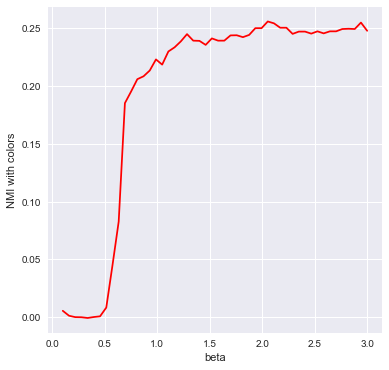

In [50]:
betas=np.linspace(.1,3,50)
fin_nmi=[]
for beta in betas:
    #This is where we would want to be able to recall the BP algorithm
    #without having to reconstruct the graph.  Presumably we could use 
    #the state of previous BP as warm initialization
    bpgc=modbp.BP_Modularity(edgelist=pv, _n=n, q=q, beta=beta, transform=False)
    bpgc.run()
    marg=np.array(bpgc.return_marginals())
    color_dict={0:"red",1:"blue",2:'green'}
    RSBM.graph.vs['color']=map(lambda x : color_dict[np.argmax(x)],marg)
    cnmi=RSBM.get_AMI_with_blocks(RSBM.graph.vs['color'])
#     print("NMI at beta={:.2f}: {:.3f}".format(beta,cnmi))
    fin_nmi.append(cnmi)

fin_nmi=np.array(fin_nmi)
plt.close()
f,a=plt.subplots(1,1,figsize=(6,6))
a.plot(betas,fin_nmi,color='r')
a.set_xlabel('beta')
a.set_ylabel('NMI with colors')
plt.show()

In [2]:
n = 1000
q = 2
nblocks = q
c = 3.0
ep = .1
pin = c / (1.0 + ep) / (n * 1.0 / q)
pout = c / (1 + 1.0 / ep) / (n * 1.0 / q)
prob_mat = np.identity(nblocks) * pin + (np.ones((nblocks, nblocks)) - np.identity(nblocks)) * pout
read = True
if read:
    print 'loading graph from file'
    RSBM = modbp.RandomSBMGraph(n, prob_mat, graph=ig.load('RSMB_test.graphml.gz'))
    print ("{:d},{:d}".format(RSBM.n,RSBM.m))
else:
    RSBM = modbp.RandomSBMGraph(n=n, comm_prob_mat=prob_mat,transform=False)
    RSBM.graph.save('RSMB_test.graphml.gz')

beta=1.5
#call directly
elist = RSBM.get_edgelist()
elist.sort()
pv = modbp.bp.PairVector(elist)
bpgc = modbp.BP_Modularity(edgelist=pv, _n=n, q=q, beta=beta, transform=False)
print ('niters to converge', bpgc.run(1000))
marg = np.array(bpgc.return_marginals())
print (marg[:5])
part=np.argmax(marg,axis=1)
print ("modularity: {:.4f} ".format(ig.VertexClustering(RSBM.graph,membership=part).modularity))
print ("AMI: {:.3f}".format(RSBM.get_AMI_with_blocks(labels=part)))
print ("accuracy: {:.3f}".format(np.sum(RSBM.block == part) / (1.0 * n)))

#test it with the calss method
mbpinterface = modbp.ModularityBP(RSBM.graph)  # create class
mbpinterface.run_modbp(beta,2,1000)
print mbpinterface.marginals[2][beta][:5]
print ('niters to converge',mbpinterface.niters[2][beta])
print ('modularity: {:.4f}'.format(mbpinterface.retrieval_modularities[2][beta]))
print part[:20]
print mbpinterface.partitions[2][beta][:20]
print "AMI two partitions {:.3f}".format(skm.adjusted_mutual_info_score(part,mbpinterface.partitions[2][beta]))
# print 'AMI=',RSBM.get_AMI_with_blocks(mbpinterface.partitions[2][beta])
# print "accuracy=",RSBM.get_accuracy(mbpinterface.partitions[2][beta])

loading graph from file
1000,1502
('niters to converge', 30)
[[0.02786616 0.97213384]
 [0.05291597 0.94708403]
 [0.13891308 0.86108692]
 [0.80188059 0.19811941]
 [0.20623338 0.79376662]]
modularity: 0.4354 
AMI: 0.551
accuracy: 0.096
[[0.02786616 0.97213384]
 [0.05291597 0.94708403]
 [0.13891308 0.86108692]
 [0.80188059 0.19811941]
 [0.20623338 0.79376662]]
('niters to converge', 30)
modularity: 0.4354
[1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
AMI two partitions 0.867


# hysteresis in modbp

In [2]:
n=1000
q=2
nblocks=q
c=3.0
ep=.2
pin=c/(1.0+ep)/(n*1.0/q)
pout=c/(1+1.0/ep)/(n*1.0/q)
prob_mat = np.identity(q) * pin + (np.ones((q, q)) - np.identity(q)) * pout
print prob_mat
randSBM=modbp.RandomSBMGraph(n,prob_mat)

mbpinterface=modbp.ModularityBP(randSBM.graph)
mbpinterface.run_modbp(q=2,beta=1.2)
mbpinterface.run_modbp(q=2,beta=.2)
mbpinterface.run_modbp(q=2,beta=.1)
mbpinterface.run_modbp(q=2,beta=.01)
print mbpinterface.retrieval_modularities
print 
mbpinterface2=modbp.ModularityBP(randSBM.graph)
mbpinterface2.run_modbp(q=2,beta=.01)
mbpinterface2.run_modbp(q=2,beta=.1)
mbpinterface2.run_modbp(q=2,beta=.2)
mbpinterface2.run_modbp(q=2,beta=1.2)
print mbpinterface2.retrieval_modularities


[[0.005 0.001]
 [0.001 0.005]]
{2: {0.01: 0.032831634073836845, 1.2: 0.30903585153264035, 0.1: 0.027631386581825516, 0.2: -0.007583358859935556}}

{2: {0.2: 0.0006420085490911082, 1.2: -0.0178363506937434, 0.1: -0.014715723574745352, 0.01: -0.027641829282725697}}


In [9]:
vc=ig.VertexClustering(graph=g,membership=mbpinterface.partitions[0])
vc.modularity

0.01357499144212429

[[0.005 0.001]
 [0.001 0.005]]
observed epsilon 0.1999
average degree: 3.032


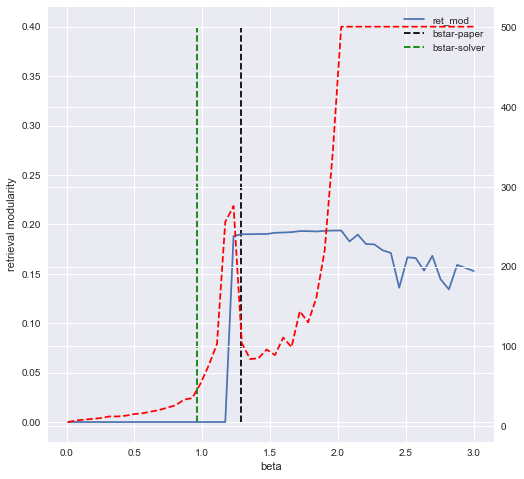

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm
n=1000
q=2
nblocks=q
c=3
ep=.2
pin=c/(1.0+ep*(q-1.0))/(n*1.0/q)
pout=c/(1+(q-1.0)/ep)/(n*1.0/q)
prob_mat = np.identity(q) * pin + (np.ones((q, q)) - np.identity(q)) * pout
print prob_mat

g=ig.load('working2com_graph.graphml.gz')
randSBM=modbp.RandomSBMGraph(n,prob_mat,graph=g)

print('observed epsilon {:.4f}'.format(1.0/randSBM.get_pin_pout_ratio()))
mbpinterface=modbp.ModularityBP(randSBM.graph,use_effective=True)

print("average degree: {:.3f}".format(2.0*mbpinterface.totaledgeweight/mbpinterface.n))
betas=np.linspace(.01,3,50)
# betas=np.array([.1,.5,1,1.2])
qs=np.array([2])#,4,5])

for q in qs:
    for beta in betas:
        mbpinterface.run_modbp(q=q,beta=beta,niter=500)

plt.close()
f,a=plt.subplots(1,1,figsize=(8,8))


a.plot(mbpinterface.retrieval_modularities['beta'].values,
       mbpinterface.retrieval_modularities['retrieval_modularity'].values,
      label='ret_mod')
     
a.vlines(x=mbpinterface.get_bstar(2),ymin=0,ymax=.4,linestyle='--',label='bstar-paper')
a.vlines(x=mbpinterface.retrieval_modularities['bstar'][0],ymin=0,
         ymax=.4,linestyle='--',color='green',label='bstar-solver')

a2=a.twinx()
a2.plot(mbpinterface.retrieval_modularities['beta'].values,
       mbpinterface.retrieval_modularities['niters'].values,
        linestyle='--',color='r',label='niter')


a.set_xlabel("beta")
a.set_ylabel("retrieval modularity")
a.legend()
plt.show()


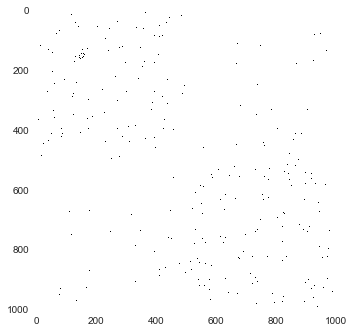

In [9]:
plt.close()
plt.imshow(randSBM.get_adjacency())
plt.show()

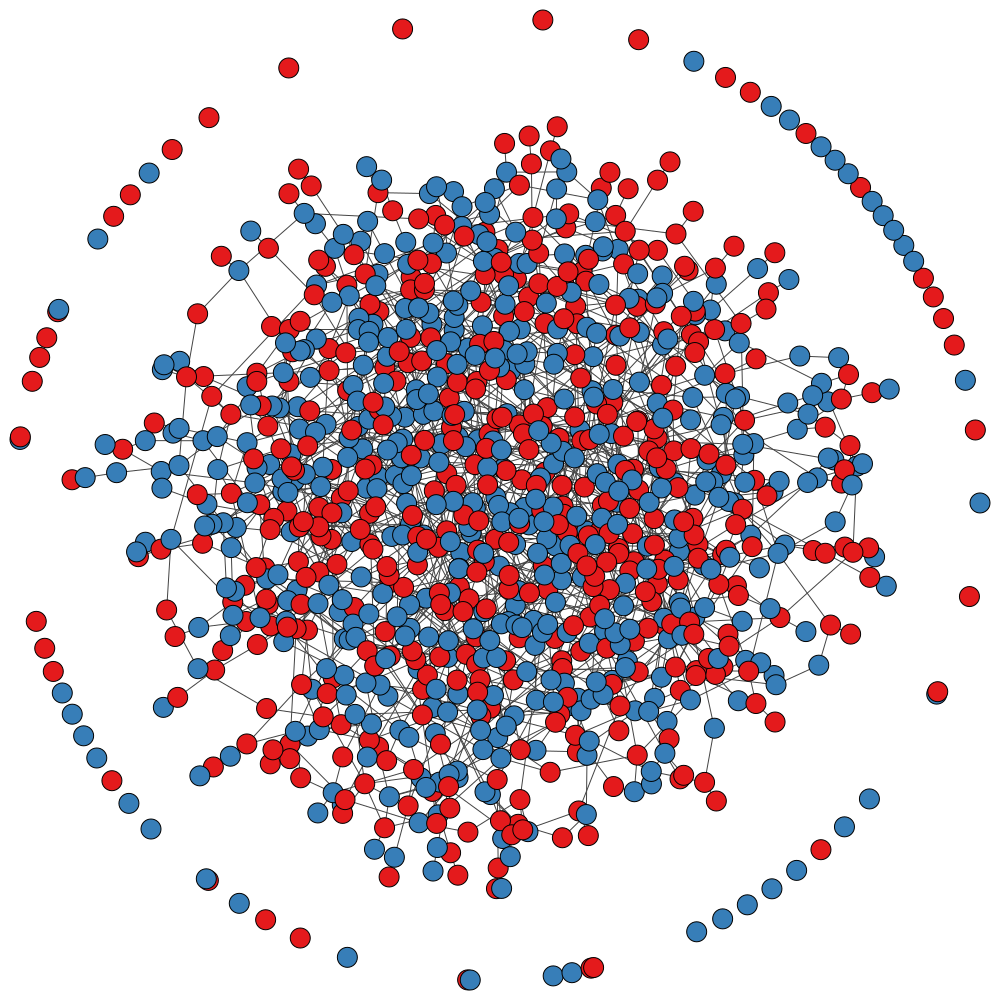

In [6]:
color_dict=dict(zip(range(10),sbn.color_palette('Set1',10)))
randSBM.graph.vs['color']=map(lambda x : color_dict[x] ,mbpinterface.partitions[2][0.986326530612245])
# randSBM.graph.vs['color']=map(lambda x : color_dict[x] ,randSBM.graph.vs['block'])

#create forceatlas layout
adj=np.array(randSBM.get_adjacency())
pos=fa2.forceatlas2(adj,scalingRatio=1000,gravity=.05,strongGravityMode=True,edgeWeightInfluence=0)
layout=ig.Layout(pos)
ig.plot(randSBM.graph,layout=layout,inline=True,bbox=[1000,1000])

In [22]:
randSBM.get_AMI_with_blocks(mbpinterface.partitions[2][1.5355102040816326])

0.27366695392661416

[[0.01655172 0.00114286 0.00114286 0.00114286]
 [0.00114286 0.01655172 0.00114286 0.00114286]
 [0.00114286 0.00114286 0.01655172 0.00114286]
 [0.00114286 0.00114286 0.00114286 0.01655172]]


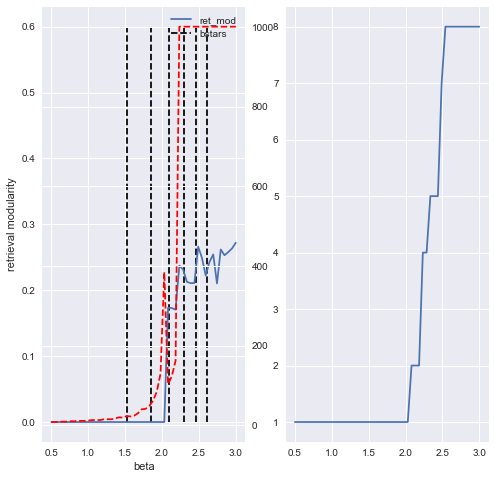

In [13]:
n=500
q=4
nblocks=q
c=3.0
ep=.15
pin=c/(1.0+ep*(q-1.0))/(n*1.0/q)
pout=c/(1+(q-1.0)/ep)/(n*1.0/q)
prob_mat = np.identity(q) * pin + (np.ones((q, q)) - np.identity(q)) * pout
print (prob_mat)

outgraph="random_test-graph.graphml.gz"
read=False
if read:
    randSBM=modbp.RandomSBMGraph(n=n,comm_prob_mat=prob_mat,graph=ig.load(outgraph))
else:
    randSBM=modbp.RandomSBMGraph(n,prob_mat)
    randSBM.graph.save(outgraph)
mbpinterface=modbp.ModularityBP(randSBM.graph,use_effective=True,accuracy_off=True)

betas=np.linspace(.5,3,50)
betastars=np.array([ mbpinterface.get_bstar(i) for i in range(2,8)])
# betas=np.array([.1,.5,1,1.2])
qmax=8
colors=sbn.color_palette('cubehelix',n_colors=len(qs))

for beta in betas:
    mbpinterface.run_modbp(q=qmax,beta=beta,niter=1000)

plt.close()
f,a=plt.subplots(1,2,figsize=(8,4))

a=plt.subplot(1,2,1)
a.plot(mbpinterface.retrieval_modularities['beta'].values,
      mbpinterface.retrieval_modularities['retrieval_modularity'].values,label='ret_mod')

a2=a.twinx()
a2.plot(mbpinterface.retrieval_modularities['beta'].values,
      mbpinterface.retrieval_modularities['niters'].values,linestyle='--',color='r',label='niter')

a.vlines(x=betastars,ymin=0,ymax=.6,linestyle='--',label='bstars')
a.set_xlabel("beta")
a.set_ylabel("retrieval modularity")
a.legend()

a=plt.subplot(1,2,2)
a.plot(mbpinterface.retrieval_modularities['beta'],
       mbpinterface.retrieval_modularities['num_coms'],label='number_coms')

plt.show()


# Testing on football network
We scan to look at how many communities are suggested

 We also run SBMBP on the football network for comparison 

## football scanning q
We try Zhang and Moore's method of running BP across many different values of q to look for plateaus

In [343]:
#confirmt that it is still working on the single layer case 
import numpy as np
np.set_printoptions(precision=4,suppress=True)
import matplotlib.pyplot as plt
from time import time
from __future__ import print_function
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm
import os
graphics_dir='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/multimodbp_manuscript/graphics'

fbnet=ig.load("./football.net.graphml.gz")
mlbp_fb = modbp.ModularityBP(mlgraph=fbnet,accuracy_off=True,use_effective=True)
mlbp_fb.graph.comm_vec=np.array(fbnet.vs['value_tsevans'])
fbnet.vs['block']=fbnet.vs['value_tsevans']

ntrials=20
qvals=np.array([2,3,4,5,6,7,8,9])
bstars=map(lambda x : mlbp_fb.get_bstar(x) ,qvals)
# resgammas=np.linspace(.1,1.5,5)
resgammas=np.array([.5,1,1.5]) 
for i,q in enumerate(qvals):
    print('q {:d}'.format(q), end=',')
    for trial in range(ntrials):
        print(" {:} ".format(trial),end='')
        betas=np.linspace(bstars[i]-.2,bstars[i]+.2,10)
        for j,beta in enumerate(betas):
    #         for trial in range(ntrials):
            mlbp_fb.run_modbp(q=q,beta=beta,resgamma=1.0,omega=0,niter=1000,reset=True)
    print()


q 2, 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 
q 3, 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 
q 4, 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 
q 5, 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 
q 6, 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 
q 7, 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 
q 8, 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 
q 9, 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19 


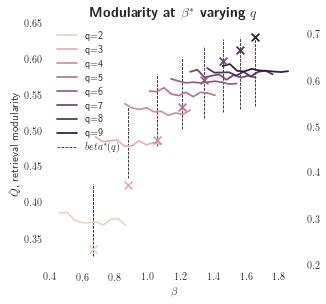

In [344]:
plt.rc('text',usetex=True)
plt.close()
f,a=plt.subplots(1,1,figsize=(4.5,4.5))
colors=sbn.cubehelix_palette(n_colors=len(qvals))
avgretmods=mlbp_fb.retrieval_modularities.groupby(['q','beta']).mean()

# avgretmods=mlbp_fb.retrieval_modularities.groupby(['q','beta'])['retrieval_modularity'].apply(lambda x : x.value_counts())
modavgs=[]
a2=a.twinx()
for i,q  in enumerate(qvals):
    avgretmods.loc[q]
    
    a.plot(avgretmods.loc[q].index,
#             avgretmods.loc[q].values,
            avgretmods.loc[q]['retrieval_modularity'],
            color=colors[i],
           label='q={:d}'.format(q))
    a2.scatter(bstars[i],
#             avgretmods.loc[q].values,
        avgretmods.loc[q]['AMI'].mean(),
        color=colors[i],marker='x',s=60)
    
    modavgs.append(np.mean(avgretmods.loc[q]['retrieval_modularity'].values))
modavgs=np.array(modavgs)
a.vlines(x=bstars,ymin=modavgs-.05,ymax=modavgs+.05,linestyle='--',label=r'$beta^*(q)$',linewidth=.75)
a.set_title(r'\textbf{{Modularity at $\beta^*$ varying $q$}}',fontsize=14,
            fontweight='bold')
a.set_xlabel(r'$\beta$')
a.set_ylabel(r'$\hat{{Q}}$, retrieval modularity')
a.legend(loc=2)
f.savefig(os.path.join(graphics_dir,'selecting_q_football.pdf'))
plt.show()
plt.rc('text',usetex=False)


# scan beta allowing q to float

In [365]:
# run SBMBP on the input graph with the chosen q, using the EM algorithm to learn parameters
# returns the AMI of the learned partition

def run_SBMBP_on_graph(graph,qrange=(2,5)):
    sbmbpfile = os.path.join('./','mode_net/sbm')
    outdir = os.path.join('./','modbpdata/LFR_test_data/')
    rprefix = np.random.randint(100000)
    tmp_grph_file = os.path.join(outdir, '{:d}temporary_graph_file.gml'.format(rprefix))
    graph.save(tmp_grph_file)
    all_partitions = {}
    final_values = {}
    for q in range(*qrange):
        parameters = [
            sbmbpfile, 'learn',
            "-l", tmp_grph_file,
            '-q', '{:d}'.format(q),
            '-M', '{:}_q{:d}_marginals.txt'.format(tmp_grph_file, q),
            '-d', '1',
            '-i', '1'
            #         '-L','{:}_q{:d}_planted_cab.txt'.format(grph_file,q),
            #         '--spcmode','{:d}'.format(0),
            #         '--wcab','{:}_q{:d}_cab.txt'.format(grph_file,q)
        ]
        process = Popen(parameters, stderr=PIPE, stdout=PIPE)
        stdout, stderr = process.communicate()
        if process.returncode != 0:
            print(stdout)
            raise RuntimeError("running SBMBP failed : {:}".format(stderr))
        # print(stdout)
        marginal_file = '{:}_q{:d}_marginals.txt'.format(tmp_grph_file, q)
        marginals = []
        partition = []
        inmargs = False
        inpartition = False
        with open(marginal_file, 'r') as f:

            for i, line in enumerate(f.readlines()):
                if re.search("\A\s*\Z", line):  # only while space
                    continue
                if i == 0:
                    fin_vals = dict([tuple(val.split('=')) for val in line.split()])
                    for k, val in fin_vals.items():
                        fin_vals[k] = float(val)
                    final_values[q] = fin_vals
                if re.search('marginals:', line):
                    inmargs = True
                    inpartition = False
                    continue
                if re.search('argmax_configuration', line):
                    inmargs = False
                    inpartition = True
                    continue
                if inmargs:
                    marginals.append(line.split())
                if inpartition:
                    partition = line.split()

        partition = np.array(partition, dtype=int)
        all_partitions[q] = partition
        if os.path.exists(marginal_file):
            os.remove(marginal_file)
    if os.path.exists(tmp_grph_file):
        os.remove(tmp_grph_file)


    minq = sorted(final_values.items(), key=lambda x: x[1]['f'])[0][0]
    minf = sorted(final_values.items(), key=lambda x: x[1]['f'])[0][1]['f']
    AMI=skm.adjusted_mutual_info_score(all_partitions[q], graph.vs['block'])
    return AMI,minq,minf


In [381]:
#confirmt that it is still working on the single layer case 
import numpy as np
np.set_printoptions(precision=4,suppress=True)
import matplotlib.pyplot as plt
from time import time
import igraph as ig

import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm
graphics_dir='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/multimodbp_manuscript/graphics'

fbnet=ig.load("./football.net.graphml.gz")
mlbp_fb = modbp.ModularityBP(mlgraph=fbnet,accuracy_off=True,use_effective=True)
mlbp_fb.graph.comm_vec=np.array(fbnet.vs['value_tsevans'])

for k in fbnet.attributes():
    del fbnet[k]
for k in fbnet.vs.attributes():
    del fbnet.vs[k]
    
fbnet.vs['block']=mlbp_fb.graph.comm_vec

ntrials=1
qmax=15
bstars=map(lambda x : mlbp_fb.get_bstar(x) ,range(2,qmax+1))

# betas=np.linspace(bstars[0],bstars[-1],50)
# betas=bstars
betas=np.linspace(0,2.6,50)

resgammas=np.array([.5,1,1.5,3]) 
sbm_res=pd.DataFrame(columns=['AMI','q','f'])
for i in range(6):
    t=time()
    cind=sbm_res.shape[0]
    sbm_ami,q,f=run_SBMBP_on_graph(fbnet,qrange=(4,15))
    print ('sbmbp rt={:.4f}'.format(time()-t),end=' ')
    sbm_res.loc[cind,['AMI','q','f']]=[sbm_ami,q,f]
print()
for gamma in resgammas:
    print(gamma,end=',')
    for i,beta in enumerate(betas):
            print (beta,end=' ')


#         if i%10==0: print("{:d}/{:d}".format(i,len(betas)))
#         for trial in range(ntrials):

            mlbp_fb.run_modbp(q=qmax,beta=beta,resgamma=gamma,omega=0,niter=1000,reset=True)
    print()

mlbp_fb.retrieval_modularities.sort_values(by='beta',inplace=True)


sbmbp rt=84.7288 sbmbp rt=52.5048 sbmbp rt=52.8305 sbmbp rt=43.8104 sbmbp rt=67.3840 sbmbp rt=84.2598 
0.5,0.0 0.05306122448979592 0.10612244897959185 0.15918367346938778 0.2122448979591837 0.2653061224489796 0.31836734693877555 0.37142857142857144 0.4244897959183674 0.47755102040816333 0.5306122448979592 0.5836734693877551 0.6367346938775511 0.689795918367347 0.7428571428571429 0.7959183673469389 0.8489795918367348 0.9020408163265307 0.9551020408163267 1.0081632653061225 1.0612244897959184 1.1142857142857143 1.1673469387755102 1.2204081632653063 1.2734693877551022 1.326530612244898 1.379591836734694 1.4326530612244899 1.4857142857142858 1.5387755102040819 1.5918367346938778 1.6448979591836737 1.6979591836734695 1.7510204081632654 1.8040816326530613 1.8571428571428572 1.9102040816326533 1.9632653061224492 2.016326530612245 2.069387755102041 2.122448979591837 2.175510204081633 2.2285714285714286 2.2816326530612248 2.3346938775510204 2.3877551020408165 2.4408163265306126 2.49387755102040

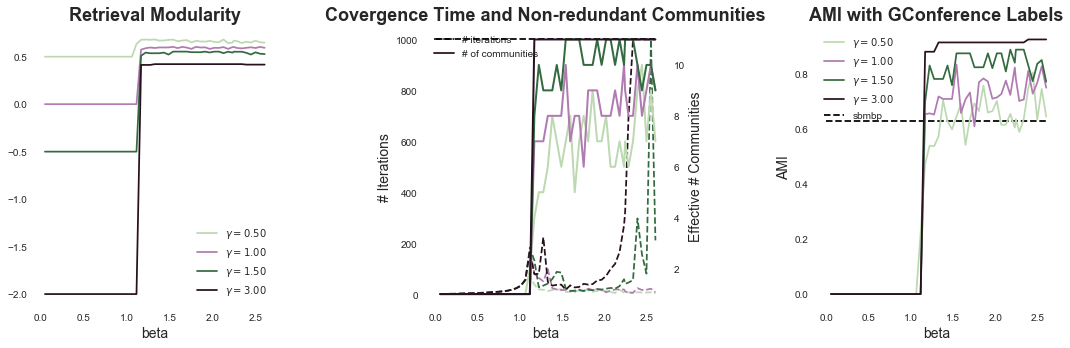

In [382]:
import network_tools as nt
nt.visualization.set_matplotlib_defaults()

sbm_q=sbm_res.loc[sbm_res.astype(float)['f'].idxmin()]['q']
sbm_ami=sbm_res.loc[sbm_res.astype(float)['f'].idxmin()]['AMI']

plt.close()      
f,a=plt.subplots(1,3,figsize=(15,5))
a=plt.subplot(1,3,1)
mean_bpvals=mlbp_fb.retrieval_modularities.groupby(['resgamma','beta']).mean()
a.set_xlabel('beta',fontsize=14)
a.set_title("Retrieval Modularity",fontsize=18,fontweight='bold')
colors=sbn.cubehelix_palette(n_colors=len(resgammas),light=.8,dark=.1,rot=2)
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a.plot(mean_bpvals.loc[gam,:].index,
          mean_bpvals.loc[gam,:]['retrieval_modularity'],label=r"$\gamma={:.2f}$".format(gam),color=colors[i])

# a.vlines(x=bstars,ymin=0,ymax=.36,linestyle='--',label='bstars',lw=.5)
# a.set_ylim([-.1,.5])
a.legend()
    #     a.plot(mean_bpvals.index,
#            mean_bpvals['AMI'],color='g',label="AMI with ground")
    
# a.plot(mean_bpvals.index,
#        mean_bpvals['Accuracy'],color='c',label="Accuracy")

# a.vlines(x=bstars,ymin=0,ymax=.5,linestyle='--',label='Beta_star',alpha=.5)
# a.vlines(x=mlbp_fb.get_bstar(q=qmax),ymin=0,ymax=.5,linestyle='--',label='Beta_star')

a=plt.subplot(1,3,2)
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a.plot(mean_bpvals.loc[gam,:].index.values,
           mean_bpvals.loc[gam,:]['niters'].values,color=colors[i],linestyle='--')
a.set_ylabel('# Iterations',fontsize=14)
a.set_xlabel('beta',fontsize=14)

a.plot([],[],color=colors[-1],label='# iterations',linestyle='--')


a2=a.twinx()
a.set_title("Covergence Time and Non-redundant Communities",fontsize=18,fontweight='bold')
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a2.plot(mean_bpvals.loc[gam,:].index.values,
          mean_bpvals.loc[gam,:]['num_coms'].values,#marker='x',s=15,
              color=colors[i],linewidth=2)
a2.hlines(y=sbm_q,xmin=betas[0],xmax=betas[-1],linestyle='--',label='sbmbp')
a.plot([],[],color=colors[-1],label='# of communities')
a2.set_ylabel('Effective # Communities',fontsize=14)

a.legend()

a=plt.subplot(1,3,3)


a.set_title("AMI with GConference Labels",fontsize=18,fontweight='bold')

for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a.plot(mean_bpvals.loc[gam,:].index.values,
          mean_bpvals.loc[gam,:]['AMI'].values,label=r"$\gamma={:.2f}$".format(gam),color=colors[i])
    
a.hlines(y=sbm_ami,xmin=betas[0],xmax=betas[-1],linestyle='--',label='sbmbp')

a.set_ylabel('AMI',fontsize=14)
a.set_xlabel('beta',fontsize=14)
# a.set_ylim([0,9])

a.legend(loc=0)
# dmat=mlbp_fb.group_distances[mlbp_fb.retrieval_modularities['AMI'].idxmax()]
# a.grid('off')
# plt.imshow(dmat,origin='lower')
# plt.colorbar()
plt.tight_layout()
plt.show()
f.savefig(os.path.join(graphics_dir,'americanfootballscanq.pdf'))
plt.rc('text',usetex=False)


# Scanning the gamma range Football

In [73]:
#confirmt that it is still working on the single layer case 
import numpy as np
np.set_printoptions(precision=4,suppress=True)
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm

fbnet=ig.load("./football.net.graphml.gz")
mlbp_fb = modbp.ModularityBP(mlgraph=fbnet,accuracy_off=True,use_effective=True)
mlbp_fb.graph.comm_vec=np.array(fbnet.vs['value_tsevans'])

qmax=20
bstars=map(lambda x : mlbp_fb.get_bstar(x) ,range(2,qmax+1))
betas=np.linspace(bstars[0],bstars[-1],len(bstars)*2)
# betas=np.linspace(1.5,2.5,10)
ntrials=1
resgammas=np.linspace(.5,4,25)
# resgammas=np.array([1,2,3])
for gamma in resgammas:
    print(gamma)
    for i,beta in enumerate(betas):
        for niter in range(ntrials):
            mlbp_fb.run_modbp(q=qmax,beta=beta,resgamma=gamma,omega=0,niter=500,reset=True)


0.5
0.6458333333333334
0.7916666666666667
0.9375
1.0833333333333335
1.2291666666666667
1.375
1.5208333333333335
1.6666666666666667
1.8125
1.9583333333333335
2.104166666666667
2.25
2.3958333333333335
2.541666666666667
2.6875
2.8333333333333335
2.979166666666667
3.125
3.2708333333333335
3.416666666666667
3.5625
3.7083333333333335
3.854166666666667
4.0


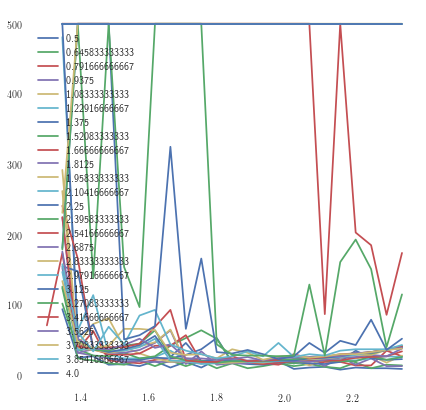

In [74]:
df_means=mlbp_fb.retrieval_modularities[mlbp_fb.retrieval_modularities['qstar']>1].groupby(['resgamma','beta']).mean()
plt.close()
f,a=plt.subplots(1,1,figsize=(7,7))
for gam in df_means.index.get_level_values(0).unique():
    a.plot(df_means.loc[gam].index,df_means.loc[gam]['niters'],label=gam)
a.legend()
plt.show()

In [75]:
#we only look at partitions that are not in the trivial solution (#need to add this in)
mininds=mlbp_fb.retrieval_modularities[mlbp_fb.retrieval_modularities['is_trivial']==False].groupby(['resgamma'])['niters'].idxmin().values
min_iters_df=mlbp_fb.retrieval_modularities.loc[mininds,:]

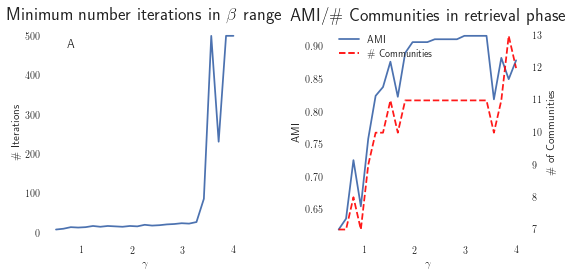

In [82]:
plt.close()
plt.rc('text',usetex=True)
f,a=plt.subplots(1,2,figsize=(8,4))
a=plt.subplot(1,2,1)
a.set_title(r"Minimum number iterations in $\beta$ range",fontsize=18,fontweight='bold')
a.set_xlabel(r"$\gamma$")
a.set_ylabel(r"\# Iterations")
a.text(s='A',x=.1,y=.9,transform=a.transAxes,fontweight='bold')
a.plot(min_iters_df['resgamma'],min_iters_df['niters'])
# a2=a.twinx()
# a2.plot(min_iters_df['resgamma'],min_iters_df['retrieval_modularity'])

a=plt.subplot(1,2,2)
a.set_title("AMI/\# Communities in retrieval phase",fontsize=18,fontweight='bold')
a.plot(min_iters_df['resgamma'],min_iters_df['AMI'],label="AMI")
a2=a.twinx()
a2.plot(min_iters_df['resgamma'],min_iters_df['num_coms'],linestyle='--',alpha=.9,color='r')
a.plot([],[],linestyle='--',label=r'\# Communities',color='r')
a.set_xlabel(r"$\gamma$")
a.set_ylabel(r"AMI")
a2.set_ylabel(r"\# of Communities")

a.legend(loc=2)
plt.tight_layout()
f.savefig(os.path.join(graphics_dir,'football_gamma_scan.pdf'))
plt.show()
plt.rc('text',usetex=False)


In [489]:
# colors=sbn.color_palette('cubehelix',13)
colors=sbn.cubehelix_palette(n_colors=15,light=.9,dark=.1,rot=4,gamma=1)
# colors=['white','black']
# ml_sbm.layer_sbms[0].graph.vs['color']=map( lambda x: colors[x], ml_sbm.get_all_layers_block())
# fbnet.vs['color']=map( lambda x: colors[x],
#                                            mlbp.partitions[mlbp.retrieval_modularities['AMI'].idxmax()])
fbnet.vs['color']=map( lambda x: colors[x],
                                            mlbp_fb.partitions[min_iters_df['AMI'].idxmax()])

# ml_sbm.layer_sbms[0].graph.vs['color']=map(lambda x: colors[x], 
#                                            (mlbp.partitions[mlbp.retrieval_modularities['retrieval_modularity'].idxmax()]==ml_sbm.get_all_layers_block()).astype(int))

fbnet.vs['size']=15
fbnet.vs['label']=''
adj=np.array(fbnet.get_adjacency().data)
pos=fa2.forceatlas2(adj,scalingRatio=500,gravity=.1,strongGravityMode=True,edgeWeightInfluence=0)
layout=ig.Layout(pos)
import network_tools as nt

igrplt_af=ig.plot(fbnet,layout=layout,inline=True,bbox=[400,400])
igrplt_af.save(os.path.join(graphics_dir,'igraph_american_football.pdf'))

# Test multilayer SBM

time to create 30 nodes and 3 layers : 0.01472


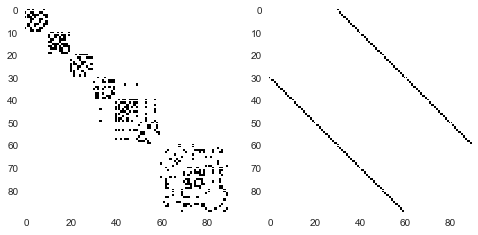

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm
np.random.seed(1)
n = 30
nlayers=3
q = 3
nblocks = q
c = 5.0
ep = .0001
pin = c / (1.0 + ep) / (n * 1.0 / q)
pout = c / (1 + 1.0 / ep) / (n * 1.0 / q)
prob_mat = np.identity(nblocks) * pin + (np.ones((nblocks, nblocks)) - np.identity(nblocks)) * pout
t=time()
ml_sbm=modbp.MultilayerSBM(n,comm_prob_mat=prob_mat,layers=nlayers,transition_prob=.2)
print( "time to create {:d} nodes and {:d} layers : {:.5f}".format(n,nlayers,time()-t))


plt.close()
f,a=plt.subplots(1,2,figsize=(8,8))
a=plt.subplot(1,2,1)
plt.imshow(ml_sbm.get_intralayer_adj())
a=plt.subplot(1,2,2)
plt.imshow(ml_sbm.get_interlayer_adj())


inter_adj=np.zeros((ml_sbm.n*ml_sbm.nlayers,ml_sbm.n*ml_sbm.nlayers))
for ei,ej in ml_sbm.interedges:
    inter_adj[int(ei),int(ej)]=1
intra_adj=np.zeros((ml_sbm.n*ml_sbm.nlayers,ml_sbm.n*ml_sbm.nlayers))
for ei,ej in ml_sbm.intraedges:
    intra_adj[int(ei),int(ej)]=1
    intra_adj[int(ej),int(ei)]=1


plt.show()

# SBM Testing Sinlge Layer

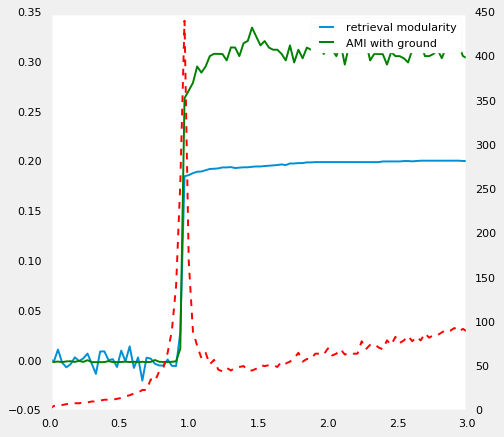

In [162]:
#confirmt that it is still working on the single layer case 
import numpy as np
np.set_printoptions(precision=4,suppress=True)
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm
n = 1000
q = 2
nlayers=1
nblocks = q
c = 3
ep = .2
pin = c / (1.0 + ep * (q - 1.0)) / (n * 1.0 / q)
pout = c / (1 + (q - 1.0) / ep) / (n * 1.0 / q)
prob_mat = np.identity(nblocks) * pin + (np.ones((nblocks, nblocks)) - np.identity(nblocks)) * pout
ml_sbm = modbp.MultilayerSBM(n, comm_prob_mat=prob_mat, layers=nlayers, transition_prob=0)
mgraph = modbp.MultilayerGraph(ml_sbm.intraedges, ml_sbm.interedges, ml_sbm.layer_vec,
                               comm_vec=ml_sbm.get_all_layers_block())
mlbp = modbp.ModularityBP(mlgraph=mgraph)
bstar=mlbp.get_bstar(q=q)
beta = bstar
# mlbp.run_modbp(beta=beta, resgamma=1, q=q,niter=1000,omega=0)
betas=np.linspace(0,3,100)
for beta in betas:
    mlbp.run_modbp(q=2,beta=beta,omega=0,niter=1000)
plt.close()
f,a=plt.subplots(1,1,figsize=(6,6))
a.plot(mlbp.retrieval_modularities['beta'],
       mlbp.retrieval_modularities['retrieval_modularity'],label='retrieval modularity')
a.plot(mlbp.retrieval_modularities['beta'],
       mlbp.retrieval_modularities['AMI'],color='g',label="AMI with ground")
a2=a.twinx()
a2.plot(mlbp.retrieval_modularities['beta'],
       mlbp.retrieval_modularities['niters'],color='r',linestyle='--',label='niters')
a.legend()
plt.show()

## Fixed q at right valuestest

In [48]:
#confirmt that it is still working on the single layer case 
import numpy as np
np.set_printoptions(precision=4,suppress=True)
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm
import os
graphics_dir='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/multimodbp_manuscript/graphics'

n = 1000
q = 4
nlayers=1
nblocks = q
c = 3
ep = .15
pin = c / (1.0 + ep * (q - 1.0)) / (n * 1.0 / q)
pout = c / (1 + (q - 1.0) / ep) / (n * 1.0 / q)
prob_mat = np.identity(nblocks) * pin + (np.ones((nblocks, nblocks)) - np.identity(nblocks)) * pout
ml_sbm = modbp.MultilayerSBM(n, comm_prob_mat=prob_mat, 
                             layers=nlayers, transition_prob=.1,use_gcc=True)

mgraph = modbp.MultilayerGraph(intralayer_edges=ml_sbm.intraedges, interlayer_edges= ml_sbm.interedges, layer_vec= ml_sbm.layer_vec,
                               comm_vec=ml_sbm.get_all_layers_block())
mlbp_4comeven_fixq = modbp.ModularityBP(mlgraph=mgraph,use_effective=False,
                                   accuracy_off=True)
# mlbp_4comeven_fixq.run_modbp(beta=beta, resgamma=1, q=q,niter=1000,omega=0)

# betas=np.linspace(.5,2.5,50)

ntrials=1
qmax=8
bstars=map(lambda x : mlbp_4comeven_fixq.get_bstar(x) ,range(2,qmax+1))
# betas=np.linspace(bstars[0],bstars[-1],50)
# betas=bstars
betas=np.linspace(1,4,50)

# resgammas=np.linspace(.1,1.5,5)
resgammas=np.array([1,4,8]) 

for gamma in resgammas:
    print(gamma)
    for i,beta in enumerate(betas):
#         if i%10==0: print("{:d}/{:d}".format(i,len(betas)))
        for trial in range(ntrials):
            mlbp_4comeven_fixq.run_modbp(q=q,beta=beta,resgamma=gamma,omega=0,niter=1000,reset=True)
 

1
4
8


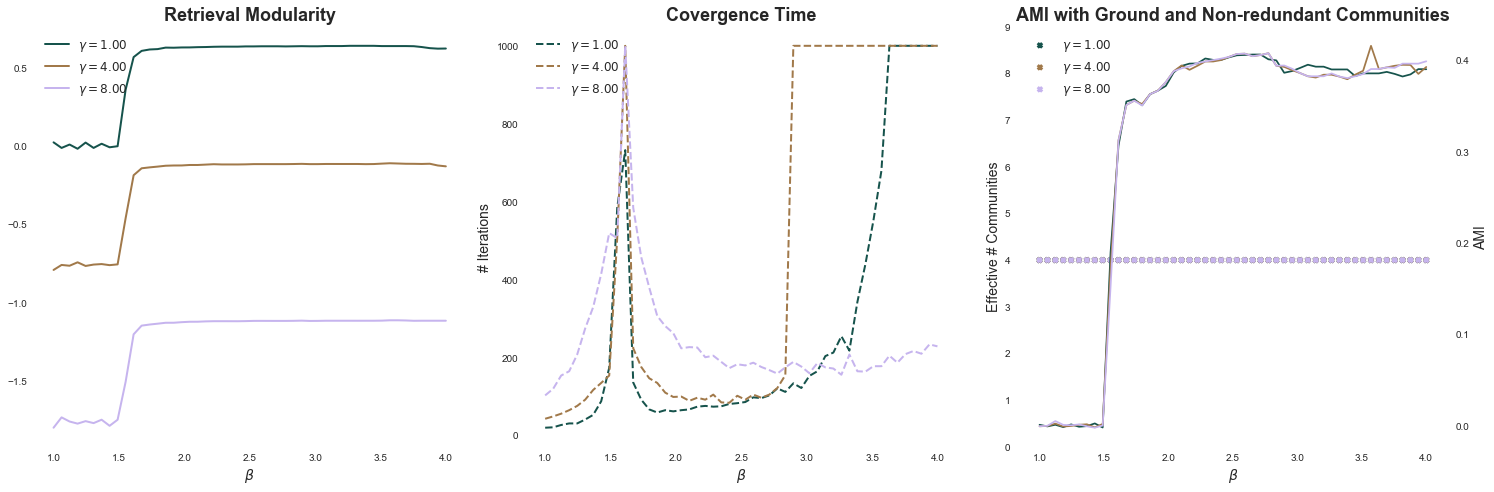

In [57]:
import network_tools as nt
nt.visualization.set_matplotlib_defaults()

plt.close()      
f,a=plt.subplots(1,3,figsize=(21,7))
a=plt.subplot(1,3,1)
mean_bpvals=mlbp_4comeven_fixq.retrieval_modularities.groupby(['resgamma','beta']).mean()
a.set_xlabel(r'$\beta$',fontsize=14)
a.set_title("Retrieval Modularity",fontsize=18,fontweight='bold')
colors=sbn.color_palette(palette='cubehelix',n_colors=len(resgammas))
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a.plot(mean_bpvals.loc[gam,:].index,
          mean_bpvals.loc[gam,:]['retrieval_modularity'],linewidth=2,
           label=r"$\gamma={:.2f}$".format(gam),color=colors[i])

# a.vlines(x=bstars,ymin=0,ymax=.36,linestyle='--',label='bstars',lw=.5)
a.legend(fontsize=12,loc=2)
    #     a.plot(mean_bpvals.index,
#            mean_bpvals['AMI'],color='g',label="AMI with ground")
    
# a.plot(mean_bpvals.index,
#        mean_bpvals['Accuracy'],color='c',label="Accuracy")

# a.vlines(x=bstars,ymin=0,ymax=.5,linestyle='--',label='Beta_star',alpha=.5)
# a.vlines(x=mlbp_4comeven_fixq.get_bstar(q=qmax),ymin=0,ymax=.5,linestyle='--',label='Beta_star')

a=plt.subplot(1,3,2)
a.set_title("Covergence Time",fontsize=18,fontweight='bold')
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a.plot(mean_bpvals.loc[gam,:].index,
           mean_bpvals.loc[gam,:]['niters'],linewidth=2,
           color=colors[i],linestyle='--',label=r"$\gamma={:.2f}$".format(gam))
a.set_ylabel('# Iterations',fontsize=14)
a.set_xlabel(r'$\beta$',fontsize=14)
a.legend(fontsize=12,loc=2)


a=plt.subplot(1,3,3)
a.set_title("AMI with Ground and Non-redundant Communities",fontsize=18,fontweight='bold')
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a.scatter(mean_bpvals.loc[gam,:].index.values,
          mean_bpvals.loc[gam,:]['num_coms'].values,marker='x',s=20,
           label=r"$\gamma={:.2f}$".format(gam),color=colors[i],linewidth=3,linestyle='-.')
a.set_xlabel(r'$\beta$',fontsize=14)
a.set_ylim([0,9])
a.set_ylabel('Effective # Communities',fontsize=14)
a.legend(fontsize=12,loc=2)

# a.set_title("AMI")
a2=a.twinx()
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a2.plot(mean_bpvals.loc[gam,:].index.values,
          mean_bpvals.loc[gam,:]['AMI'].values,label=gam,color=colors[i])
a2.set_ylabel('AMI',fontsize=14)

# dmat=mlbp_4comeven_fixq.group_distances[mlbp_4comeven_fixq.retrieval_modularities['AMI'].idxmax()]
# a.grid('off')
# plt.imshow(dmat,origin='lower')
# plt.colorbar()
plt.tight_layout()
plt.show()
f.savefig(os.path.join(graphics_dir,'fourcom_even_varyinggamma4c_fixq.pdf'))
plt.rc('text',usetex=False)


## q allowed to float

In [60]:
#confirmt that it is still working on the single layer case 
import numpy as np
np.set_printoptions(precision=4,suppress=True)
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import os
import sklearn.metrics as skm
graphics_dir='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/multimodbp_manuscript/graphics'

n = 1000
q = 4
nlayers=1
nblocks = q
c = 4
ep = .1
pin = c / (1.0 + ep * (q - 1.0)) / (n * 1.0 / q)
pout = c / (1 + (q - 1.0) / ep) / (n * 1.0 / q)
prob_mat = np.identity(nblocks) * pin + (np.ones((nblocks, nblocks)) - np.identity(nblocks)) * pout
ml_sbm = modbp.MultilayerSBM(n, comm_prob_mat=prob_mat, layers=nlayers, transition_prob=.1,use_gcc=True)
mgraph = modbp.MultilayerGraph(intralayer_edges=ml_sbm.intraedges,interlayer_edges=ml_sbm.interedges,
                               layer_vec= ml_sbm.layer_vec,
                               comm_vec=ml_sbm.get_all_layers_block())
print( 'number of nodes {:d}'.format(mgraph.n))
mlbp_4comeven = modbp.ModularityBP(mlgraph=mgraph,accuracy_off=True,use_effective=True)
# mlbp_4comeven.run_modbp(beta=beta, resgamma=1, q=q,niter=1000,omega=0)

# betas=np.linspace(.5,2.5,50)

ntrials=1
qmax=8
bstars=map(lambda x : mlbp_4comeven.get_bstar(x) ,range(2,qmax+1))
# betas=np.linspace(bstars[0],bstars[-1],50)
# betas=bstars
betas=np.linspace(1,2.6,50)

# resgammas=np.linspace(.5,1,7)
resgammas=np.array([.5,1,1.5]) 

for gamma in resgammas:
    print(gamma)
    for i,beta in enumerate(betas):
#         if i%10==0: print("{:d}/{:d}".format(i,len(betas)))
        for trial in range(ntrials):
            mlbp_4comeven.run_modbp(q=qmax,beta=beta,resgamma=gamma,omega=0,niter=1000,reset=True)
 

number of nodes 955
0.5
1.0
1.5


In [61]:
import network_tools as nt
nt.visualization.set_matplotlib_defaults()

plt.close()      
f,a=plt.subplots(1,3,figsize=(15,5))
a=plt.subplot(1,3,1)
mean_bpvals=mlbp_4comeven.retrieval_modularities.groupby(['resgamma','beta']).mean()
a.set_xlabel(r'$\beta$',fontsize=14)
a.set_title("Retrieval Modularity",fontsize=18,fontweight='bold')
colors=sbn.color_palette(palette='cubehelix',n_colors=len(resgammas))
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a.plot(mean_bpvals.loc[gam,:].index,
          mean_bpvals.loc[gam,:]['retrieval_modularity'],label=r"$\gamma={:.2f}$".format(gam),color=colors[i])

# a.vlines(x=bstars,ymin=0,ymax=.36,linestyle='--',label='bstars',lw=.5)
a.legend()
    #     a.plot(mean_bpvals.index,
#            mean_bpvals['AMI'],color='g',label="AMI with ground")
    
# a.plot(mean_bpvals.index,
#        mean_bpvals['Accuracy'],color='c',label="Accuracy")

# a.vlines(x=bstars,ymin=0,ymax=.5,linestyle='--',label='Beta_star',alpha=.5)
# a.vlines(x=mlbp_4comeven.get_bstar(q=qmax),ymin=0,ymax=.5,linestyle='--',label='Beta_star')

a=plt.subplot(1,3,2)
a.set_title("Covergence Time",fontsize=18,fontweight='bold')
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a.plot(mean_bpvals.loc[gam,:].index,
           mean_bpvals.loc[gam,:]['niters'],color=colors[i],linestyle='--',label=r"$\gamma={:.2f}$".format(gam))
a.set_ylabel('# Iterations',fontsize=14)
a.set_xlabel(r'$\beta$',fontsize=14)
a.legend()


a=plt.subplot(1,3,3)
a.set_title("AMI with Ground \nand Non-redundant Communities",fontsize=18,fontweight='bold')
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a.scatter(mean_bpvals.loc[gam,:].index.values,marker='x',s=20,
          mean_bpvals.loc[gam,:]['num_coms'].values,label=r"$\gamma={:.2f}$".format(gam),color=colors[i],linewidth=2,linestyle='-.')
a.set_xlabel(r'$\beta$',fontsize=14)
a.set_ylim([0,9])
a.set_ylabel('Effective # Communities',fontsize=14)
a.legend()

# a.set_title("AMI")
a2=a.twinx()
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a2.plot(mean_bpvals.loc[gam,:].index.values,
          mean_bpvals.loc[gam,:]['AMI'].values,label=gam,color=colors[i])
a2.set_ylabel('AMI',fontsize=14)

# dmat=mlbp_4comeven.group_distances[mlbp_4comeven.retrieval_modularities['AMI'].idxmax()]
# a.grid('off')
# plt.imshow(dmat,origin='lower')
# plt.colorbar()
plt.tight_layout()
plt.show()
f.savefig(os.path.join(graphics_dir,'fourcom_even_varyinggamma4c.pdf'))
plt.rc('text',usetex=False)


SyntaxError: non-keyword arg after keyword arg (<ipython-input-61-5751cb7034b0>, line 40)

In [59]:
colors=sbn.color_palette('Set1',qmax)
# colors=['white','black']
# ml_sbm.layer_sbms[0].graph.vs['color']=map( lambda x: colors[x], ml_sbm.get_all_layers_block())
# ml_sbm.layer_sbms[0].graph.vs['color']=map( lambda x: colors[x],
#                                            mlbp_4comeven.partitions[mlbp_4comeven.retrieval_modularities['AMI'].idxmax()])
ml_sbm.layer_sbms[0].graph.vs['color']=map( lambda x: colors[x],
                                           mlbp_4comeven.partitions[26])

# ml_sbm.layer_sbms[0].graph.vs['color']=map(lambda x: colors[x], 
#                                            (mlbp_4comeven.partitions[mlbp_4comeven.retrieval_modularities['retrieval_modularity'].idxmax()]==ml_sbm.get_all_layers_block()).astype(int))

ml_sbm.layer_sbms[0].graph.vs['size']=5
adj=np.array(ml_sbm.get_intralayer_adj())
pos=fa2.forceatlas2(adj,scalingRatio=5000,gravity=.1,strongGravityMode=True,edgeWeightInfluence=0)
layout=ig.Layout(pos)
# ig.plot(ml_sbm.layer_sbms[0].graph,layout=layout,inline=True,bbox=[400,400])

grplt=ig.plot(ml_sbm.layer_sbms[0].graph,layout=layout,inline=True,bbox=[400,400])
grplt.save(os.path.join(graphics_dir,'igraph_even_commlayout4c.pdf'))

In [43]:
un,cnts=np.unique(mlbp_4comeven.partitions[26],return_counts=True)
print(un,cnts)
print('marginals')
print(mlbp_4comeven.marginals[26][np.where(mlbp_4comeven.partitions[26]==1)[0]])

(array([0, 1, 2, 3, 4]), array([221,  11, 236, 239, 248]))
marginals
[[0.1485 0.1485 0.0652 0.0625 0.1316 0.1485 0.1485 0.1469]
 [0.143  0.143  0.0938 0.092  0.1167 0.143  0.143  0.1253]
 [0.163  0.163  0.0685 0.0698 0.1227 0.163  0.163  0.087 ]
 [0.1489 0.1489 0.0948 0.0945 0.1131 0.1489 0.1489 0.1021]
 [0.1489 0.1489 0.0948 0.0945 0.1131 0.1489 0.1489 0.1021]
 [0.1427 0.1427 0.1123 0.1191 0.096  0.1427 0.1427 0.1017]
 [0.1477 0.1477 0.1135 0.1339 0.0767 0.1477 0.1477 0.0852]
 [0.1407 0.1407 0.1019 0.1003 0.0973 0.1407 0.1407 0.1378]
 [0.1455 0.1455 0.1148 0.093  0.0876 0.1455 0.1455 0.1227]
 [0.1547 0.1547 0.1206 0.0654 0.0546 0.1547 0.1547 0.1405]
 [0.1551 0.1551 0.0932 0.0944 0.0672 0.1551 0.1551 0.1248]]


In [45]:
mlbp_4comeven.group_maps[26]

{0: {0, 1, 5, 6},
 1: {0, 1, 5, 6},
 2: {2},
 3: {3},
 4: {4},
 5: {0, 1, 5, 6},
 6: {0, 1, 5, 6},
 7: {7}}

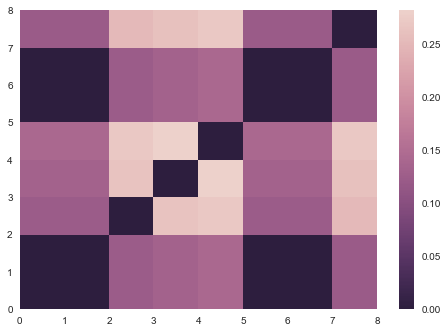

In [46]:
cmap=sbn.cubehelix_palette(as_cmap=True,reverse=True)
plt.close()

plt.pcolormesh(mlbp_4comeven.group_distances[26],cmap=cmap)
plt.colorbar()
plt.show()

In [21]:
mlbp_4comeven.group_distances[26]

array([[0.    , 0.1083, 0.1083, 0.1845, 0.1083, 0.2299, 0.2472, 0.1083],
       [0.1083, 0.    , 0.    , 0.0657, 0.    , 0.1162, 0.1317, 0.    ],
       [0.1083, 0.    , 0.    , 0.0657, 0.    , 0.1162, 0.1317, 0.    ],
       [0.1845, 0.0657, 0.0657, 0.    , 0.0657, 0.1931, 0.2067, 0.0657],
       [0.1083, 0.    , 0.    , 0.0657, 0.    , 0.1162, 0.1317, 0.    ],
       [0.2299, 0.1162, 0.1162, 0.1931, 0.1162, 0.    , 0.255 , 0.1162],
       [0.2472, 0.1317, 0.1317, 0.2067, 0.1317, 0.255 , 0.    , 0.1317],
       [0.1083, 0.    , 0.    , 0.0657, 0.    , 0.1162, 0.1317, 0.    ]])

# Test with 4 uneven Community 

In [50]:
#confirmt that it is still working on the single layer case 
import numpy as np
np.set_printoptions(precision=4,suppress=True)
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm
graphics_dir='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/multimodbp_manuscript/graphics'

n = 1000
q = 4
nlayers=1
nblocks = q
c = 4
ep = .1
pin = c / (1.0 + ep * (q - 1.0)) / (n * 1.0 / q)
pout = c / (1 + (q - 1.0) / ep) / (n * 1.0 / q)
node_per_block=[350,350,150,150]
prob_mat = np.identity(nblocks) * pin + (np.ones((nblocks, nblocks)) - np.identity(nblocks)) * pout
ml_sbm = modbp.MultilayerSBM(n, comm_prob_mat=prob_mat,block_sizes0=node_per_block,
                             layers=nlayers, transition_prob=.1)
mgraph = modbp.MultilayerGraph(intralayer_edges=ml_sbm.intraedges,interlayer_edges=ml_sbm.interedges, 
                               layer_vec=ml_sbm.layer_vec,
                               comm_vec=ml_sbm.get_all_layers_block())
mlbp_4com_uneven = modbp.ModularityBP(mlgraph=mgraph,accuracy_off=True,use_effective=True)
# mlbp_4com_uneven.run_modbp(beta=beta, resgamma=1, q=q,niter=1000,omega=0)

# betas=np.linspace(.5,2.5,50)

ntrials=1
qmax=8
bstars=map(lambda x : mlbp_4com_uneven.get_bstar(x) ,range(2,qmax+1))
# betas=np.linspace(bstars[0],bstars[-1],50)
betas=np.linspace(1,2.6,50)

# resgammas=np.linspace(.1,1.5,5)
resgammas=np.array([.5,1,1.5]) 

for gamma in resgammas:
    print(gamma)
    for i,beta in enumerate(betas):
#         if i%10==0: print("{:d}/{:d}".format(i,len(betas)))
        for trial in range(ntrials):
            mlbp_4com_uneven.run_modbp(q=qmax,beta=beta,resgamma=gamma,omega=0,niter=500,reset=True)
 

0.5
1.0
1.5


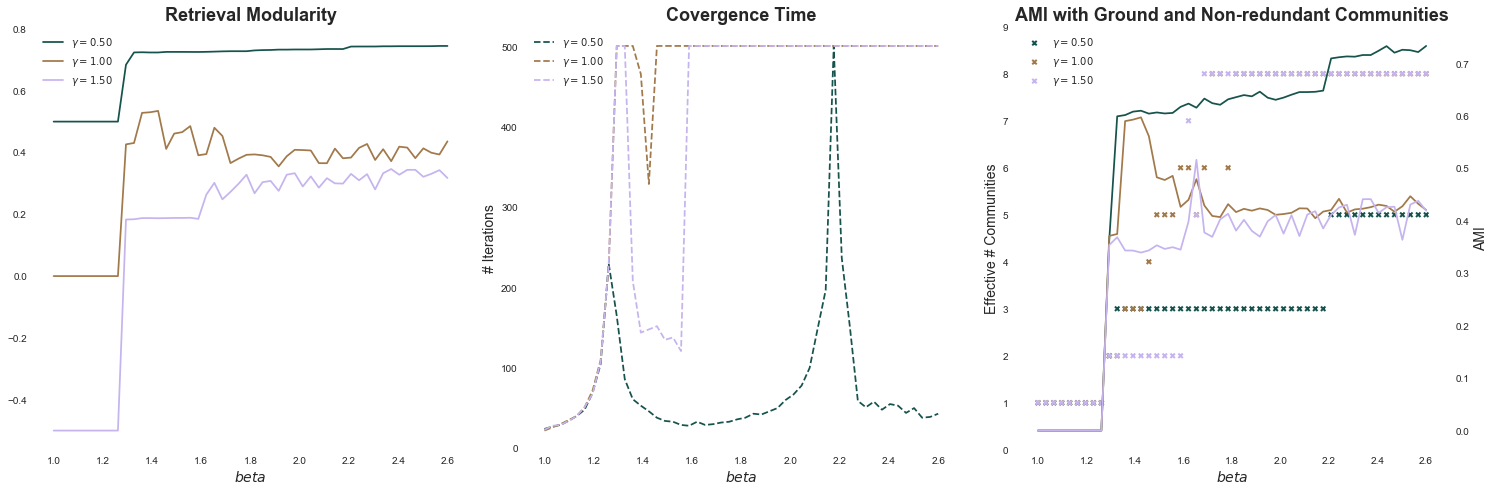

In [53]:
import network_tools as nt
nt.visualization.set_matplotlib_defaults()

plt.close()      
f,a=plt.subplots(1,3,figsize=(21,7))
a=plt.subplot(1,3,1)
mean_bpvals=mlbp_4com_uneven.retrieval_modularities.groupby(['resgamma','beta']).mean()
a.set_xlabel(r'$beta$',fontsize=14)
a.set_title("Retrieval Modularity",fontsize=18,fontweight='bold')
colors=sbn.color_palette(palette='cubehelix',n_colors=len(resgammas))
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a.plot(mean_bpvals.loc[gam,:].index,
          mean_bpvals.loc[gam,:]['retrieval_modularity'],label=r"$\gamma={:.2f}$".format(gam),color=colors[i])

# a.vlines(x=bstars,ymin=0,ymax=.36,linestyle='--',label='bstars',lw=.5)
a.legend(loc=2)
    #     a.plot(mean_bpvals.index,
#            mean_bpvals['AMI'],color='g',label="AMI with ground")
    
# a.plot(mean_bpvals.index,
#        mean_bpvals['Accuracy'],color='c',label="Accuracy")

# a.vlines(x=bstars,ymin=0,ymax=.5,linestyle='--',label='Beta_star',alpha=.5)
# a.vlines(x=mlbp_4com_uneven.get_bstar(q=qmax),ymin=0,ymax=.5,linestyle='--',label='Beta_star')

a=plt.subplot(1,3,2)
a.set_title("Covergence Time",fontsize=18,fontweight='bold')
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a.plot(mean_bpvals.loc[gam,:].index,
           mean_bpvals.loc[gam,:]['niters'],color=colors[i],linestyle='--',label=r"$\gamma={:.2f}$".format(gam))
a.set_ylabel('# Iterations',fontsize=14)
a.set_xlabel(r'$beta$',fontsize=14)
a.legend(loc=2)
a=plt.subplot(1,3,3)
a.set_title("AMI with Ground and Non-redundant Communities",fontsize=18,fontweight='bold')
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a.scatter(mean_bpvals.loc[gam,:].index.values,
          mean_bpvals.loc[gam,:]['qstar'].values,marker='x',s=20,
              label=r"$\gamma={:.2f}$".format(gam),color=colors[i],linewidth=2,linestyle='-.')
a.set_xlabel(r'$beta$',fontsize=14)
a.set_ylim([0,9])
a.set_ylabel('Effective # Communities',fontsize=14)
a.legend(loc=2)

# a.set_title("AMI")
a2=a.twinx()
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a2.plot(mean_bpvals.loc[gam,:].index.values,
          mean_bpvals.loc[gam,:]['AMI'].values,label=gam,color=colors[i])
a2.set_ylabel('AMI',fontsize=14)

# dmat=mlbp_4com_uneven.group_distances[mlbp_4com_uneven.retrieval_modularities['AMI'].idxmax()]
# a.grid('off')
# plt.imshow(dmat,origin='lower')
# plt.colorbar()
plt.tight_layout()
plt.show()
f.savefig(os.path.join(graphics_dir,'fourcom_uneven_varyinggamma4c.pdf'))
plt.rc('text',usetex=False)


In [263]:
mlbp_4com_uneven.retrieval_modularities.loc[mlbp.retrieval_modularities['AMI'].idxmax()]
mlbp_4com_uneven.retrieval_modularities.loc[47]

q                        8.000000
beta                     2.534694
resgamma                 0.500000
omega                    0.000000
retrieval_modularity     0.370126
niters                  36.000000
num_coms                 6.000000
qstar                    5.000000
bstar                    2.199451
AMI_layer_avg            0.735867
AMI                      0.735867
Name: 47, dtype: float64

In [270]:
colors=sbn.color_palette('Set1',qmax)
# colors=['white','black']
# ml_sbm.layer_sbms[0].graph.vs['color']=map( lambda x: colors[x], ml_sbm.get_all_layers_block())
# ml_sbm.layer_sbms[0].graph.vs['color']=map( lambda x: colors[x],
#                                            mlbp_4com_uneven.partitions[mlbp_4com_uneven.retrieval_modularities['AMI'].idxmax()])
ml_sbm.layer_sbms[0].graph.vs['color']=map( lambda x: colors[x],
                                           mlbp_4com_uneven.partitions[47])

# ml_sbm.layer_sbms[0].graph.vs['color']=map(lambda x: colors[x], 
#                                            (mlbp_4com_uneven.partitions[mlbp_4com_uneven.retrieval_modularities['retrieval_modularity'].idxmax()]==ml_sbm.get_all_layers_block()).astype(int))

ml_sbm.layer_sbms[0].graph.vs['size']=5
adj=np.array(ml_sbm.get_intralayer_adj())
pos=fa2.forceatlas2(adj,scalingRatio=1000,gravity=.1,strongGravityMode=True,edgeWeightInfluence=0)
layout=ig.Layout(pos)
grplt=ig.plot(ml_sbm.layer_sbms[0].graph,layout=layout,inline=True,bbox=[400,400])
grplt.save(os.path.join(graphics_dir,'igraph_uneven_commlayout4c.pdf'))

# Test of LFR Benchmark
I have downloaded the cpp program to generate unweighted binary netwokrs from LFR. 
https://sites.google.com/site/andrealancichinetti/files

In [1]:
import numpy as np
np.set_printoptions(precision=4,suppress=True)
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm
from subprocess import Popen,PIPE
import pandas as pd

benchmarkfile='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/binary_networks/benchmark'
n=1000
c=3
mk=10
ep=.1
parameters=[
    benchmarkfile,
    "-N",'{:d}'.format(n),
    '-k','{:d}'.format(c),
    '-maxk','{:d}'.format(mk),
    '-mu','{:.3f}'.format(ep),
    '-t1','2',
    '-t2','1',
    '-minc','200',
    '-maxc','400',
]
process=Popen(parameters,stderr=PIPE,stdout=PIPE)
stdout,stderr=process.communicate()
print(stderr)

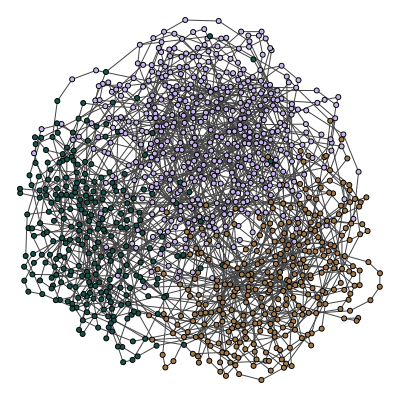

In [3]:
elist=pd.read_table('network.dat',header=None).sort_values(by=0).as_matrix()-1 #have to subtract 1 to get it to work
# elist=elist[:elist.shape[0]/2,:]
comvec=pd.read_table('community.dat',header=None).sort_values(by=0).as_matrix()[:,1]-1

mgraph=modbp.MultilayerGraph(intralayer_edges=elist,layer_vec=[0 for _ in range(1000)],
                             comm_vec=comvec)
cgraph=mgraph.layers[0]
coms=np.unique(cgraph.vs['block'])
colors=sbn.color_palette('cubehelix',len(coms))
cdict=dict(zip(coms,colors))                                            
cgraph.vs['color']=map( lambda x: cdict[x], comvec)
cgraph=cgraph.components().giant()
cgraph.vs['size']=5
adj=np.array(cgraph.get_adjacency().data)
# pos=fa2.forceatlas2(adj,scalingRatio=1000,gravity=.1,strongGravityMode=True,edgeWeightInfluence=0)
# layout=ig.Layout(pos)
# ig.plot(cgraph,layout=layout,inline=True,bbox=[400,400])

In [4]:
#run SBMBP on the input graph with the chosen q, using the EM algorithm to learn parameters
#returns the AMI of the learned partition
def run_SBMBP_on_graph(graph):
    sbmbpfile='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/test/mode_net/sbm'
    outdir='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/test/'
    tmp_grph_file=os.path.join(outdir,'temporary_graph_file.gml')
    graph.save(tmp_grph_file)
    all_partitions={}
    final_values={}
    for q in range(2,5):
        parameters=[
            sbmbpfile,'learn',
            "-l",tmp_grph_file,
            '-q','{:d}'.format(q),
            '-M','{:}_q{:d}_marginals.txt'.format(tmp_grph_file,q),
            '-d','1',
            '-i','1'
        #         '-L','{:}_q{:d}_planted_cab.txt'.format(grph_file,q),
        #         '--spcmode','{:d}'.format(0),
        #         '--wcab','{:}_q{:d}_cab.txt'.format(grph_file,q)
        ]
        process=Popen(parameters,stderr=PIPE,stdout=PIPE)
        stdout,stderr=process.communicate()
        if process.returncode!=0:
            raise RuntimeError("running SBMBP failed : {:}".format(stderr))
        
        marginal_file='{:}_q{:d}_marginals.txt'.format(tmp_grph_file,q)
        marginals=[]
        partition=[]
        inmargs=False
        inpartition=False
        with open(marginal_file,'r') as f:

            for i,line in enumerate(f.readlines()):
                if re.search("\A\s*\Z",line): #only while space
                    continue
                if i==0:
                    fin_vals=dict([tuple(val.split('=')) for val in line.split()])
                    for k,val in fin_vals.items():
                        fin_vals[k]=float(val)
                    final_values[q]=fin_vals
                if re.search('marginals:',line):
                    inmargs=True
                    inpartition=False
                    continue
                if re.search('argmax_configuration',line):
                    inmargs=False
                    inpartition=True
                    continue
                if inmargs:
                    marginals.append(line.split())
                if inpartition:
                    partition=line.split()
                    
    
        partition=np.array(partition,dtype=int)
        all_partitions[q]=partition
    minq=sorted(final_values.items(),key=lambda x: x[1]['f'])[0][0]
    return skm.adjusted_mutual_info_score(all_partitions[q],graph.vs['block'])

    

In [5]:
run_SBMBP_on_graph(graph)

NameError: name 'graph' is not defined

In [187]:
from subprocess import Popen,PIPE
import pandas as pd
import re
import numpy as np
np.set_printoptions(precision=4,suppress=True)
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm
import pandas as pd
import os



def create_lfr_graph(n=1000,ep=.1,c=3,mk=10,use_gcc=True):
    benchmarkfile='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/binary_networks/benchmark'

    parameters=[
        benchmarkfile,
        "-N",'{:d}'.format(n),
        '-k','{:d}'.format(c),
        '-maxk','{:d}'.format(mk),
        '-mu','{:.3f}'.format(ep),
        '-t1','2',
        '-t2','1',
        '-minc','200',
        '-maxc','300',
        ]
    process=Popen(parameters,stderr=PIPE,stdout=PIPE)
    stdout,stderr=process.communicate()

    if process.returncode!=0:
        raise RuntimeError("creating LFR failed : {:}".format(stderr))
    
    elist=pd.read_table('network.dat',header=None).sort_values(by=0).as_matrix()-1 #have to subtract 1 to get it to work
    # elist=elist[:elist.shape[0]/2,:]
    comvec=pd.read_table('community.dat',header=None).sort_values(by=0).as_matrix()[:,1]-1
    mgraph=modbp.MultilayerGraph(intralayer_edges=elist,layer_vec=[0 for _ in range(1000)],
                                 comm_vec=comvec)
    cgraph=mgraph.layers[0]
    coms=np.unique(cgraph.vs['block'])
    colors=sbn.color_palette('cubehelix',len(coms))
    cdict=dict(zip(coms,colors))                                            
    cgraph.vs['color']=map( lambda x: cdict[x], comvec)
    if use_gcc:
        cgraph=cgraph.components().giant()
    return cgraph


#run SBMBP on the input graph with the chosen q, using the EM algorithm to learn parameters
#returns the AMI of the learned partition
def run_SBMBP_on_graph(graph):
    sbmbpfile='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/test/mode_net/sbm'
    outdir='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/test/'
    tmp_grph_file=os.path.join(outdir,'temporary_graph_file.gml')
    graph.save(tmp_grph_file)
    all_partitions={}
    final_values={}
    for q in range(2,5):
        parameters=[
            sbmbpfile,'learn',
            "-l",tmp_grph_file,
            '-q','{:d}'.format(q),
            '-M','{:}_q{:d}_marginals.txt'.format(tmp_grph_file,q),
            '-d','1',
            '-i','1'
        #         '-L','{:}_q{:d}_planted_cab.txt'.format(grph_file,q),
        #         '--spcmode','{:d}'.format(0),
        #         '--wcab','{:}_q{:d}_cab.txt'.format(grph_file,q)
        ]
        process=Popen(parameters,stderr=PIPE,stdout=PIPE)
        stdout,stderr=process.communicate()
        if process.returncode!=0:
            raise RuntimeError("running SBMBP failed : {:}".format(stderr))
        
        marginal_file='{:}_q{:d}_marginals.txt'.format(tmp_grph_file,q)
        marginals=[]
        partition=[]
        inmargs=False
        inpartition=False
        with open(marginal_file,'r') as f:

            for i,line in enumerate(f.readlines()):
                if re.search("\A\s*\Z",line): #only while space
                    continue
                if i==0:
                    fin_vals=dict([tuple(val.split('=')) for val in line.split()])
                    for k,val in fin_vals.items():
                        fin_vals[k]=float(val)
                    final_values[q]=fin_vals
                if re.search('marginals:',line):
                    inmargs=True
                    inpartition=False
                    continue
                if re.search('argmax_configuration',line):
                    inmargs=False
                    inpartition=True
                    continue
                if inmargs:
                    marginals.append(line.split())
                if inpartition:
                    partition=line.split()
                    
    
        partition=np.array(partition,dtype=int)
        all_partitions[q]=partition
    minq=sorted(final_values.items(),key=lambda x: x[1]['f'])[0][0]
    return skm.adjusted_mutual_info_score(all_partitions[q],graph.vs['block'])

    

qmax=8
ntrials=5
eps=np.linspace(.01,.5,15)
# eps=[.01]
# bstars=[lfr_mbp.get_bstar(q) for q in range(2,qmax)]
# betas=np.linspace(bstars[0],bstars[-1],len(bstars)*2)
resgammas=np.array([.5,1,1.5])
# resgammas=[1]

all_runs=pd.DataFrame(columns=['ntrial','ep','AMI','beta','resgamma','niters'])
all_sbmbp_runs=pd.DataFrame(columns=['ep','AMI'])

for ep in eps:
    print("eps={:.3f}".format(ep))
    for i,gamma in enumerate(resgammas):
        for trial in range(ntrials):
            graph=create_lfr_graph(ep=ep)
            sbm_ami=run_SBMBP_on_graph(graph)
            cind=all_sbmbp_runs.shape[0]
            all_sbmbp_runs.loc[cind,'AMI']=sbm_ami
            all_sbmbp_runs.loc[cind,'ep']=ep
            lfr_mbp=modbp.ModularityBP(mlgraph=graph,accuracy_off=True,use_effective=True,
                       comm_vec=np.array(graph.vs['block']))
            bstars=[lfr_mbp.get_bstar(q) for q in range(2,qmax)]
            betas=np.linspace(bstars[0],bstars[-1],len(bstars)*4)

            for beta in betas:
                lfr_mbp.run_modbp(beta=beta,niter=1000,q=qmax,resgamma=gamma,omega=0)
            lfmb_rm=lfr_mbp.retrieval_modularities
            minidx=lfmb_rm[lfmb_rm['niters']<1000 ]['retrieval_modularity'].idxmax()
            cind=all_runs.shape[0]
            all_runs.loc[cind,'ntrial']=trial
            all_runs.loc[cind,'ep']=ep

            all_runs.loc[cind,['beta','resgamma','niters','AMI']]=lfmb_rm.loc[minidx,['beta','resgamma','niters','AMI']]
    

eps=0.010


KeyboardInterrupt: 

In [ ]:
all_runs

In [162]:
amis=all_runs.astype(float).groupby(['resgamma','ep']).mean()
# plt.close()
# f,a=plt.subplots(1,1,figsize=(6,6))
# a.plot(amis.index,amis['AMI'])
# plt.show()

In [158]:
amis.loc[.5].index

Float64Index([           0.01, 0.0644444444444,  0.118888888889,
               0.173333333333,  0.227777777778,  0.282222222222,
               0.336666666667,  0.391111111111,  0.445555555556,
                          0.5],
             dtype='float64', name=u'ep')

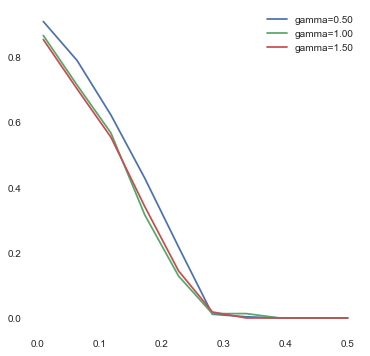

In [163]:
plt.close()
f,a=plt.subplots(1,1,figsize=(6,6))
for gamma in amis.index.get_level_values(0).unique():
    a.plot(amis.loc[gamma].index,
          amis.loc[gamma]['AMI'],label='gamma={:.2f}'.format(gamma))
a.legend()
plt.show()

## Get data from many runs on the cluster testting SBM vs modbp

In [471]:
from subprocess import Popen,PIPE
import pandas as pd
import re
import numpy as np
np.set_printoptions(precision=4,suppress=True)
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm
import pandas as pd
import os

# infile='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/test/merged_all_LFR_test_data_gamma2_beta1_k4'

infile='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/test/merged_all_LFR_test_data'
infile2='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/test/merged_all_LFR_test_data_gamma3_beta2'

graphics_dir="/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/multimodbp_manuscript/graphics"
allruns=pd.read_csv(infile,index_col=0)
allruns.index=range(allruns.shape[0])
allruns_sbm=allruns[allruns['isSBM'].notnull()]
amis=allruns.groupby(['resgamma','ep']).mean()
amis_sbm=allruns_sbm.groupby(['ep']).mean()

allruns2=pd.read_csv(infile2,index_col=0)
allruns2.index=range(allruns2.shape[0])
allruns_sbm2=allruns2[allruns2['isSBM'].notnull()]
amis2=allruns2.groupby(['resgamma','ep']).mean()
amis_sbm2=allruns_sbm2.groupby(['ep']).mean()

In [384]:
allruns_sbm2[(allruns_sbm2['ep']==.06).values & (allruns_sbm2['AMI']>.001).values]['AMI'].mean()

0.43732754834097226

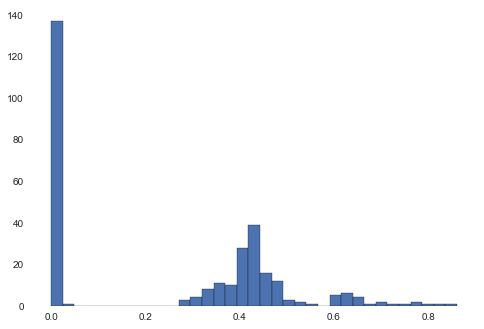

In [331]:
plt.close()
plt.hist(allruns_sbm[(allruns_sbm['ep']==.06).values]['AMI'],bins=35)
plt.show()

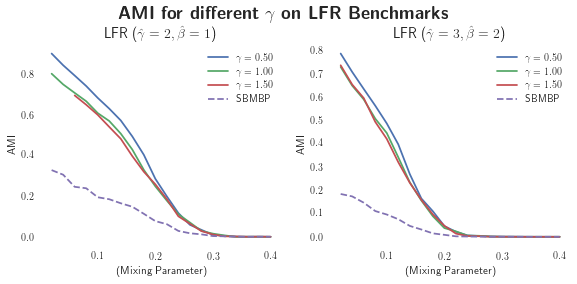

In [473]:
plt.rc('text',usetex=True)
amis=allruns.groupby(['resgamma','ep']).mean()
plt.close()
f,a=plt.subplots(1,2,figsize=(8,4))
a=plt.subplot(1,2,1)
for gamma in amis.index.get_level_values(0).unique():
    a.plot(amis.loc[gamma].index,
          amis.loc[gamma]['AMI'],label=r'$\gamma={:.2f}$'.format(gamma))
a.plot(amis_sbm.index,amis_sbm['AMI'],label='SBMBP',linestyle='--')
a.legend()
a.set_title(r"LFR ($\hat{\gamma}=2,\hat{\beta}=1$)")
a.set_xlabel(r'$\ep$(Mixing Parameter)')
a.set_ylabel(r'AMI')

a=plt.subplot(1,2,2)
for gamma in amis2.index.get_level_values(0).unique():
    a.plot(amis2.loc[gamma].index,
          amis2.loc[gamma]['AMI'],label=r'$\gamma={:.2f}$'.format(gamma))
a.plot(amis_sbm2.index,amis_sbm2['AMI'],label='SBMBP',linestyle='--')
a.legend()
a.set_title(r"LFR ($\hat{\gamma}=3,\hat{\beta}=2$)")
a.set_xlabel(r'$\ep$(Mixing Parameter)')
a.set_ylabel(r'AMI')
plt.suptitle(r"\textbf{AMI for different $\gamma$ on LFR Benchmarks}",
             fontsize=18,fontweight='bold',x=.5,y=.98,transform=f.transFigure)

f.subplots_adjust(left=.08,right=1,top=.85,bottom=.15)

f.savefig(os.path.join(graphics_dir,'LFR_comparison_SBMBP_varying_epsilon.pdf'))
plt.show()
plt.rc('text',usetex=False)


# Head to Head comparison with SBM + EM algorithm 

In [42]:
from subprocess import Popen,PIPE
import pandas as pd
import re
import numpy as np
np.set_printoptions(precision=4,suppress=True)
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm
import os
n = 1000
q = 4
nlayers=1
nblocks = q
c = 3
ep = .2
pin=(n*c/(2.0))/ ((n/float(q))*(n/float(q)-1)/2.0*float(q)+ep*(q*(q-1)/2.0)*(np.power(n/(q*1.0),2.0)))

pout=ep*pin

# node_per_block=[250,250,250,250]
node_per_block=[350,350,150,150]

prob_mat = np.identity(nblocks) * pin + (np.ones((nblocks, nblocks)) - np.identity(nblocks)) * pout

ml_sbm = modbp.MultilayerSBM(n, comm_prob_mat=prob_mat, layers=nlayers,block_sizes0=node_per_block, transition_prob=0,use_gcc=True)
mgraph = modbp.MultilayerGraph(intralayer_edges=ml_sbm.intraedges, interlayer_edges=ml_sbm.interedges, layer_vec=ml_sbm.layer_vec,
                               comm_vec=ml_sbm.get_all_layers_block())
cab=ml_sbm.layer_sbms[0].get_observed_cin_cout()
pa=ml_sbm.layer_sbms[0].get_observed_group_sizes()




In [46]:
print('')

[[7.75059513541487,
  1.5894954958118954,
  1.7350778254004062,
  1.5511653032875443],
 [1.5894954958118954,
  6.983006959054863,
  1.469000460617227,
  1.7948313898518753],
 [1.7350778254004062, 1.469000460617227, 9.62051282051282, 1.7902834008097166],
 [1.5511653032875443,
  1.7948313898518753,
  1.7902834008097166,
  8.548644338118022]]

## Even Communities

In [59]:
from subprocess import Popen,PIPE
import pandas as pd
import re
import numpy as np
np.set_printoptions(precision=4,suppress=True)
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm
import os

n=1000
q=4
ep=.1
c=4
graphics_dir='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/multimodbp_manuscript/graphics'

sbmbpfile='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/test/mode_net/sbm'
outdir='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/test/'
grph_file=os.path.join(outdir,'sbm_bp_testfiles/test_n{:d}_q{:d}_e_{:d}_c{:d}_graph.gml'.format(n,q,int(10*ep),c))

#Generate Graph
# parameters=[
#     sbmbpfile,'gen',
#     '-q','{:d}'.format(q),
#     '-w',grph_file,
#     '-n','{:d}'.format(n),
#     '-P','{:.3f},{:.3f}'.format(ep,c),
#     '--wcab','{:}_q{:d}_planted_cab.txt'.format(grph_file,q)
# ]

# #uncomment to create new graph
# process=Popen(parameters,stderr=PIPE,stdout=PIPE)
# stdout,stderr=process.communicate()
# print(stderr)
# print(stdout)
n = 1000
q = 4
nlayers=1
nblocks = q
c = 4
ep = .1
pin=(n*c/(2.0))/ ((n/float(q))*(n/float(q)-1)/2.0*float(q)+ep*(q*(q-1)/2.0)*(np.power(n/(q*1.0),2.0)))

pout=ep*pin

node_per_block=[250,250,250,250]
# node_per_block=[350,350,150,150]

prob_mat = np.identity(nblocks) * pin + (np.ones((nblocks, nblocks)) - np.identity(nblocks)) * pout

ml_sbm = modbp.MultilayerSBM(n, comm_prob_mat=prob_mat, layers=nlayers,block_sizes0=node_per_block, transition_prob=0,use_gcc=True)
mgraph = modbp.MultilayerGraph(intralayer_edges=ml_sbm.intraedges, interlayer_edges=ml_sbm.interedges, layer_vec=ml_sbm.layer_vec,
                               comm_vec=ml_sbm.get_all_layers_block())
mgraph.layers[0].save(grph_file)
cab=ml_sbm.layer_sbms[0].get_observed_cin_cout().tolist()
pa=(ml_sbm.layer_sbms[0].get_observed_group_sizes()/float(ml_sbm.layer_sbms[0].n)).tolist()
out_cab='{:}_q{:d}_planted_cab.txt'.format(grph_file,q)
with open(out_cab,'w') as fh:
    fh.write("#Vector_na:\n")
    for i,val in enumerate(pa):
        if i<len(pa)-1:
            fh.write('{:.3f}\t'.format(val))
        else:
            fh.write('{:.3f}\n'.format(val))
    fh.write('#Matrix_cab:\n')
    for row in cab:
        for i, val in enumerate(row):
            if i<len(pa)-1:
                fh.write('{:.3f} '.format(val))
            else:
                fh.write('{:.3f}\n'.format(val))


            


# grph=ig.Graph.Read_GML(grph_file)
# grph=grph.components().giant()
# grph.save(grph_file) #overwrite with gcc only
# # for some reason q=3 wouldn't work 
q_vals=[4]

for qtest in q_vals:
    parameters=[
        sbmbpfile,'infer',
        "-l",grph_file,
        '-q','{:d}'.format(qtest),
        '-M','{:}_q{:d}_marginals.txt'.format(grph_file,qtest),
        '-d','0',
        '-i','1',
        '-L','{:}_q{:d}_planted_cab.txt'.format(grph_file,q),
#         '--spcmode','{:d}'.format(0),
#         '--wcab','{:}_q{:d}_cab.txt'.format(grph_file,q)
    ]
    process=Popen(parameters,stderr=PIPE,stdout=PIPE)
    stdout,stderr=process.communicate()
    print(stderr)
    print(stdout)


VANILLA BLOCK MODEL
LARGE_DEGREE=50
Reading pa,cab from file... /Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/test/sbm_bp_testfiles/test_n1000_q4_e_1_c4_graph.gml_q4_planted_cab.txtdone
filename=/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/test/sbm_bp_testfiles/test_n1000_q4_e_1_c4_graph.gml learning_rate=1 dumping_rate=1 bp_conv_crit=0.001 learning_conv_crit=5e-08 time_conv=100 Q=4 randseed=1525805340 init_flag=1 vflag=0
reading /Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/test/sbm_bp_testfiles/test_n1000_q4_e_1_c4_graph.gml... 983 nodes 0 groups, 2043 edges, c=4.15666 max_degree=12
#Vector_na:
0.25 0.249 0.248 0.255341 
#Matrix_cab:
11.58 1.174 1.376 1.45 
1.174 13.648 1.184 1.23 
1.376 1.184 12.501 1.413 
1.45 1.23 1.413 13.319 
num_iterations=41
f=-1.01586	 L=-13078.9	 argmax_ovl=0.837906	 
marginals, argmax configuration, argmax marginals are written into /Use

In [65]:

final_vals={}
all_marginals={}
all_partitions={}
for q in q_vals:
    marginal_file='{:}_q{:d}_marginals.txt'.format(grph_file,q)
    marginals=[]
    partition=[]
    inmargs=False
    inpartition=False
    with open(marginal_file,'r') as f:

        for i,line in enumerate(f.readlines()):
            if re.search("\A\s*\Z",line): #only while space
                continue
            if i==0:
                fin_vals=dict([tuple(val.split('=')) for val in line.split()])
                for k,val in fin_vals.items():
                    fin_vals[k]=float(val)
                final_vals[q]=fin_vals
            if re.search('marginals:',line):
                inmargs=True
                inpartition=False
                continue
            if re.search('argmax_configuration',line):
                inmargs=False
                inpartition=True
                continue
            if inmargs:
                marginals.append(line.split())
            if inpartition:
                partition=line.split()
#     cmarg=np.array([], dtype=np.int64).reshape(0,2)
#     for ar in [np.array(m,dtype=float) for m in marginals]:
#         cmarg=np.vstack([cmarg,ar])
    
    all_marginals[q]=np.array(marginals[0])
    partition=np.array(partition,dtype=int)
    all_partitions[q]=partition
        
grph=ig.Graph.Read_GML(grph_file)

#run modulity BP
com2sbm_mbp=modbp.ModularityBP(mlgraph=grph,accuracy_off=True,use_effective=True,
                               comm_vec=np.array(grph.vs['block']))
ntrials=1
qmax=8
bstars=map(lambda x : com2sbm_mbp.get_bstar(x) ,range(2,qmax+1))
# betas=np.linspace(bstars[0],bstars[-1],50)
# betas=np.linspace(bstars[0],bstars[-1],len(bstars)*4)
betas=np.linspace(1,3,50)

# resgammas=np.linspace(.5,1,7)
resgammas=np.array([.5,1,1.5]) 

for gamma in resgammas:
    print(gamma)
    for i,beta in enumerate(betas):
#         if i%10==0: print("{:d}/{:d}".format(i,len(betas)))
        for trial in range(ntrials):
            com2sbm_mbp.run_modbp(q=qmax,beta=beta,resgamma=gamma,omega=0,niter=1000,reset=True)

0.5
1.0
1.5


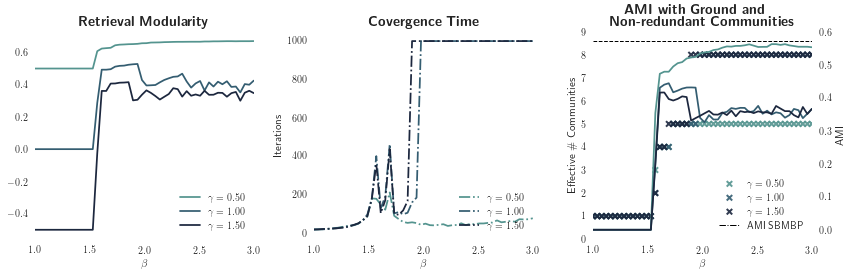

In [70]:
import network_tools as nt
nt.visualization.set_matplotlib_defaults()
plt.rc('text',usetex=True)
xlim=[1.35,2.5]
xlim=[1,3]
plt.close()      
f,a=plt.subplots(1,3,figsize=(12,4))
a=plt.subplot(1,3,1)
mean_bpvals=com2sbm_mbp.retrieval_modularities.groupby(['resgamma','beta']).mean()
a.set_xlabel(r'$\beta$',fontsize=11)
a.set_title(r"\textbf{Retrieval Modularity}",fontsize=14,fontweight='bold')
colors=sbn.cubehelix_palette(n_colors=len(resgammas),light=.5,rot=-.4)
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a.plot(mean_bpvals.loc[gam,:].index,
          mean_bpvals.loc[gam,:]['retrieval_modularity'],label=r"$\gamma={:.2f}$".format(gam),color=colors[i])
a.set_xlim(xlim)
# a.vlines(x=bstars,ymin=0,ymax=.36,linestyle='--',label='bstars',lw=.5)
a.legend(loc=4)
    #     a.plot(mean_bpvals.index,
#            mean_bpvals['AMI'],color='g',label="AMI with ground")
    
# a.plot(mean_bpvals.index,
#        mean_bpvals['Accuracy'],color='c',label="Accuracy")

# a.vlines(x=bstars,ymin=0,ymax=.5,linestyle='--',label='Beta_star',alpha=.5)
# a.vlines(x=com2sbm_mbp.get_bstar(q=qmax),ymin=0,ymax=.5,linestyle='--',label='Beta_star')

a=plt.subplot(1,3,2)
a.set_title(r"\textbf{Covergence Time}",fontsize=14,fontweight='bold')
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a.plot(mean_bpvals.loc[gam,:].index,
           mean_bpvals.loc[gam,:]['niters'],color=colors[i],linestyle='-.',label=r"$\gamma={:.2f}$".format(gam))
a.set_ylabel('# Iterations',fontsize=11)
a.set_xlabel(r'$\beta$',fontsize=11)
a.legend(loc=4)
a.set_xlim(xlim)

a=plt.subplot(1,3,3)
a.set_title(r"\textbf{AMI with Ground and\\ Non-redundant Communities}",fontsize=14,fontweight='bold')
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a.scatter(mean_bpvals.loc[gam,:].index.values,
          mean_bpvals.loc[gam,:]['num_coms'].values,marker='x',s=30,
              label=r"$\gamma={:.2f}$".format(gam),color=colors[i],linewidth=2,linestyle='-.',alpha=.9)
a.set_xlim(xlim)
a.set_xlabel(r'$\beta$',fontsize=11)
a.set_ylim([0,9])
a.set_ylabel('Effective \# Communities',fontsize=11)


# a.set_title("AMI")
a2=a.twinx()
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a2.plot(mean_bpvals.loc[gam,:].index.values,
          mean_bpvals.loc[gam,:]['AMI'].values,label=gam,color=colors[i])
a2.set_ylabel('AMI',fontsize=11)
a2.hlines(y=skm.adjusted_mutual_info_score(all_partitions[4],grph.vs['block']),
         xmin=betas[0],xmax=betas[-1],linestyle='--',linewidth=1)
a.hlines(y=[.4],xmin=1.0,xmax=1.0,linestyle='-.',linewidth=1,label='AMI SBMBP')
a.legend(loc=4)
# dmat=com2sbm_mbp.group_distances[com2sbm_mbp.retrieval_modularities['AMI'].idxmax()]
# a.grid('off')
# plt.imshow(dmat,origin='lower')
# plt.colorbar()
plt.tight_layout()
plt.show()
f.savefig(os.path.join(graphics_dir,'fourcom_even_varyinggamma4c_wsbmbp.pdf'))
plt.rc('text',usetex=False)


In [67]:
colors=sbn.color_palette('Set1',qmax)
# colors=['white','black']
# ml_sbm.layer_sbms[0].grph.vs['color']=map( lambda x: colors[x], ml_sbm.get_all_layers_block())
# ml_sbm.layer_sbms[0].grph.vs['color']=map( lambda x: colors[x],
#                                            mlbp_4comeven.partitions[mlbp_4comeven.retrieval_modularities['AMI'].idxmax()])
grph.vs['color']=map( lambda x: colors[x],
                                           com2sbm_mbp.partitions[40])

# ml_sbm.layer_sbms[0].grph.vs['color']=map(lambda x: colors[x], 
#                                            (mlbp_4comeven.partitions[mlbp_4comeven.retrieval_modularities['retrieval_modularity'].idxmax()]==ml_sbm.get_all_layers_block()).astype(int))

grph.vs['size']=5
adj=np.array(grph.get_adjacency().data)
pos=fa2.forceatlas2(adj,scalingRatio=3000,gravity=1,strongGravityMode=False,edgeWeightInfluence=0)
layout=ig.Layout(pos)
# ig.plot(ml_sbm.layer_sbms[0].grph,layout=layout,inline=True,bbox=[400,400])
# ig.plot(grph,layout=layout,inline=True,bbox=[400,400])

grplt=ig.plot(grph,layout=layout,inline=True,bbox=[400,400])
grplt.save(os.path.join(graphics_dir,'igrph_even_commlayout4c.pdf'))

## Uneven Communities

In [51]:
from subprocess import Popen,PIPE
import pandas as pd
import re
import numpy as np
np.set_printoptions(precision=4,suppress=True)
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm
import os

n = 1000
q = 4
nlayers=1
nblocks = q
c = 4
ep = .1
pin=(n*c/(2.0))/ ((n/float(q))*(n/float(q)-1)/2.0*float(q)+ep*(q*(q-1)/2.0)*(np.power(n/(q*1.0),2.0)))

pout=ep*pin

# node_per_block=[250,250,250,250]
node_per_block=[300,300,200,200]

prob_mat = np.identity(nblocks) * pin + (np.ones((nblocks, nblocks)) - np.identity(nblocks)) * pout

ml_sbm = modbp.MultilayerSBM(n, comm_prob_mat=prob_mat, layers=nlayers,block_sizes0=node_per_block, transition_prob=0,use_gcc=True)
mgraph = modbp.MultilayerGraph(intralayer_edges=ml_sbm.intraedges, interlayer_edges=ml_sbm.interedges, layer_vec=ml_sbm.layer_vec,
                               comm_vec=ml_sbm.get_all_layers_block())
mgraph.layers[0].save(grph_file)
cab=ml_sbm.layer_sbms[0].get_observed_cin_cout().tolist()
pa=(ml_sbm.layer_sbms[0].get_observed_group_sizes()/float(ml_sbm.layer_sbms[0].n)).tolist()
out_cab='{:}_q{:d}_planted_cab.txt'.format(grph_file,q)
with open(out_cab,'w') as fh:
    fh.write("#Vector_na:\n")
    for i,val in enumerate(pa):
        if i<len(pa)-1:
            fh.write('{:.3f}\t'.format(val))
        else:
            fh.write('{:.3f}\n'.format(val))
    fh.write('#Matrix_cab:\n')
    for row in cab:
        for i, val in enumerate(row):
            if i<len(pa)-1:
                fh.write('{:.3f} '.format(val))
            else:
                fh.write('{:.3f}\n'.format(val))

sbmbpfile='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/test/mode_net/sbm'
outdir='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/test/'
grph_uneven_file=os.path.join(outdir,'sbm_bp_testfiles/test_n{:d}_q{:d}_e_{:d}_c{:d}_graph.gml'.format(n,q,int(10*ep),c))
#Generate Graph
# parameters=[
#     sbmbpfile,'gen',
#     '-n','{:}'.format(n),
#     '-q','{:d}'.format(q),
#     '-w',grph_uneven_file,
#     '-p','.35,.15,.35,.15',
# #     '-n','{:d}'.format(n),
#     '-P','{:.3f},{:.3f}'.format(ep,c),
#     '--wcab','{:}_q{:d}_planted_cab.txt'.format(grph_uneven_file,q)
# ]

# #uncomment to create new graph
# process=Popen(parameters,stderr=PIPE,stdout=PIPE)
# stdout,stderr=process.communicate()
# print(stderr)
# print(stdout)
# grph_uneven=ig.Graph.Read_GML(grph_uneven_file)
# grph_uneven=grph_uneven.components().giant()
# grph_uneven.save(grph_uneven_file) #overwrite with gcc only
# for some reason q=3 wouldn't work 
q_vals=[4]

for q in q_vals:
    parameters=[
        sbmbpfile,'infer',
        "-l",grph_uneven_file,
        '-q','{:d}'.format(q),
        '-M','{:}_q{:d}_marginals.txt'.format(grph_uneven_file,q),
        '-d','0',
        '-i','1',
        '-L','{:}_q{:d}_planted_cab.txt'.format(grph_uneven_file,q),
#         '--spcmode','{:d}'.format(0),
#         '--wcab','{:}_q{:d}_cab.txt'.format(grph_uneven_file,q)
    ]
    process=Popen(parameters,stderr=PIPE,stdout=PIPE)
    stdout,stderr=process.communicate()
    print(stderr)
    print(stdout)


VANILLA BLOCK MODEL
LARGE_DEGREE=50
Reading pa,cab from file... /Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/test/sbm_bp_testfiles/test_n1000_q4_e_1_c4_graph.gml_q4_planted_cab.txtdone
filename=/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/test/sbm_bp_testfiles/test_n1000_q4_e_1_c4_graph.gml learning_rate=1 dumping_rate=1 bp_conv_crit=0.001 learning_conv_crit=5e-08 time_conv=100 Q=4 randseed=1525803536 init_flag=1 vflag=0
reading /Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/test/sbm_bp_testfiles/test_n1000_q4_e_1_c4_graph.gml... 973 nodes 0 groups, 2044 edges, c=4.20144 max_degree=12
#Vector_na:
0.303 0.303 0.195 0.201439 
#Matrix_cab:
13.328 1.23 1.337 1.111 
1.23 12.902 1.285 1.145 
1.337 1.285 10.838 1.141 
1.111 1.145 1.141 12.551 
num_iterations=98
f=-1.13044	 L=-12963.6	 argmax_ovl=0.823087	 
marginals, argmax configuration, argmax marginals are written into 

In [52]:

final_vals={}
all_marginals={}
all_partitions_uneven={}
for q in q_vals:
    marginal_file='{:}_q{:d}_marginals.txt'.format(grph_uneven_file,q)
    marginals=[]
    partition=[]
    inmargs=False
    inpartition=False
    with open(marginal_file,'r') as f:

        for i,line in enumerate(f.readlines()):
            if re.search("\A\s*\Z",line): #only while space
                continue
            if i==0:
                fin_vals=dict([tuple(val.split('=')) for val in line.split()])
                for k,val in fin_vals.items():
                    fin_vals[k]=float(val)
                final_vals[q]=fin_vals
            if re.search('marginals:',line):
                inmargs=True
                inpartition=False
                continue
            if re.search('argmax_configuration',line):
                inmargs=False
                inpartition=True
                continue
            if inmargs:
                marginals.append(line.split())
            if inpartition:
                partition=line.split()
#     cmarg=np.array([], dtype=np.int64).reshape(0,2)
#     for ar in [np.array(m,dtype=float) for m in marginals]:
#         cmarg=np.vstack([cmarg,ar])
    
    all_marginals[q]=np.array(marginals[0])
    partition=np.array(partition,dtype=int)
    all_partitions_uneven[q]=partition
        
grph_uneven=ig.Graph.Read_GML(grph_uneven_file)

#run modulity BP
com2sbmunevn_mbp=modbp.ModularityBP(mlgraph=grph_uneven,accuracy_off=True,use_effective=True,comm_vec=np.array(grph_uneven.vs['block']))
ntrials=1
qmax=8
bstars=map(lambda x : com2sbmunevn_mbp.get_bstar(x) ,range(2,qmax+1))
# betas=np.linspace(bstars[0],bstars[-1],50)
# betas=np.linspace(bstars[0],bstars[-1],len(bstars)*4)
betas=np.linspace(1,3,50)

# resgammas=np.linspace(.5,1,7)
resgammas=np.array([.5,1,1.5]) 

for gamma in resgammas:
    print(gamma)
    for i,beta in enumerate(betas):
#         if i%10==0: print("{:d}/{:d}".format(i,len(betas)))
        for trial in range(ntrials):
            com2sbmunevn_mbp.run_modbp(q=qmax,beta=beta,resgamma=gamma,omega=0,niter=1000,reset=True)

0.5
1.0
1.5


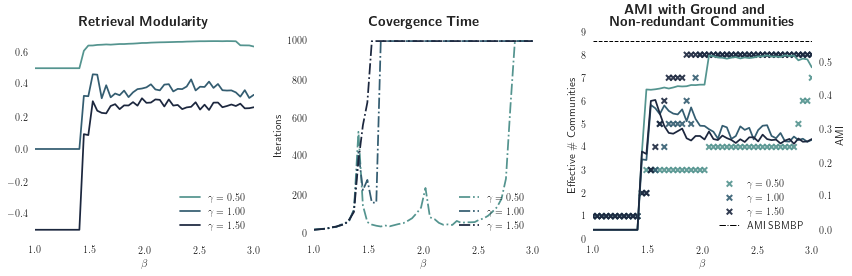

In [71]:
#### import network_tools as nt
nt.visualization.set_matplotlib_defaults()
plt.rc('text',usetex=True)
# xlim=[1.35,2.2]
xlim=[1,3]
plt.close()      
f,a=plt.subplots(1,3,figsize=(12,4))
a=plt.subplot(1,3,1)
mean_bpvals=com2sbmunevn_mbp.retrieval_modularities.groupby(['resgamma','beta']).mean()
a.set_xlabel(r'$\beta$',fontsize=11)
a.set_title(r"\textbf{Retrieval Modularity}",fontsize=14,fontweight='bold')
colors=sbn.cubehelix_palette(n_colors=len(resgammas),light=.5,rot=-.4)
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a.plot(mean_bpvals.loc[gam,:].index,
          mean_bpvals.loc[gam,:]['retrieval_modularity'],label=r"$\gamma={:.2f}$".format(gam),color=colors[i])
a.set_xlim(xlim)
# a.vlines(x=bstars,ymin=0,ymax=.36,linestyle='--',label='bstars',lw=.5)
a.legend(loc=4)
    #     a.plot(mean_bpvals.index,
#            mean_bpvals['AMI'],color='g',label="AMI with ground")
    
# a.plot(mean_bpvals.index,
#        mean_bpvals['Accuracy'],color='c',label="Accuracy")

# a.vlines(x=bstars,ymin=0,ymax=.5,linestyle='--',label='Beta_star',alpha=.5)
# a.vlines(x=com2sbmunevn_mbp.get_bstar(q=qmax),ymin=0,ymax=.5,linestyle='--',label='Beta_star')

a=plt.subplot(1,3,2)
a.set_title(r"\textbf{Covergence Time}",fontsize=14,fontweight='bold')
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a.plot(mean_bpvals.loc[gam,:].index,
           mean_bpvals.loc[gam,:]['niters'],color=colors[i],linestyle='-.',label=r"$\gamma={:.2f}$".format(gam))
a.set_ylabel('# Iterations',fontsize=11)
a.set_xlabel(r'$\beta$',fontsize=11)
a.legend(loc=4)
a.set_xlim(xlim)

a=plt.subplot(1,3,3)
a.set_title(r"\textbf{AMI with Ground and\\ Non-redundant Communities}",fontsize=14,fontweight='bold')
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a.scatter(mean_bpvals.loc[gam,:].index.values,
          mean_bpvals.loc[gam,:]['qstar'].values,marker='x',s=30,
              label=r"$\gamma={:.2f}$".format(gam),color=colors[i],linewidth=2,linestyle='-.',alpha=.9)
a.set_xlim(xlim)
a.set_xlabel(r'$\beta$',fontsize=11)
a.set_ylim([0,9])
a.set_ylabel('Effective \# Communities',fontsize=11)


# a.set_title("AMI")
a2=a.twinx()
for i,gam in enumerate(mean_bpvals.index.get_level_values(0).unique()):
    a2.plot(mean_bpvals.loc[gam,:].index.values,
          mean_bpvals.loc[gam,:]['AMI'].values,label=gam,color=colors[i])
a2.set_ylabel('AMI',fontsize=11)
a2.hlines(y=skm.adjusted_mutual_info_score(all_partitions_uneven[4],grph_uneven.vs['block']),
         xmin=betas[0],xmax=betas[-1],linestyle='--',linewidth=1)
a.hlines(y=[.4],xmin=1.0,xmax=1.0,linestyle='-.',linewidth=1,label='AMI SBMBP')
a.legend(loc=4)
# dmat=com2sbmunevn_mbp.group_distances[com2sbmunevn_mbp.retrieval_modularities['AMI'].idxmax()]
# a.grid('off')
# plt.imshow(dmat,origin='lower')
# plt.colorbar()
plt.tight_layout()
plt.show()
f.savefig(os.path.join(graphics_dir,'fourcom_uneven_varyinggamma4c_wsbmbp.pdf'))
plt.rc('text',usetex=False)


In [37]:
com2sbmunevn_mbp.retrieval_modularities[com2sbmunevn_mbp.retrieval_modularities['qstar']>4]

q      beta  resgamma  omega  retrieval_modularity  niters  \
47   8.0  2.918367       0.5    0.0              0.646968  1001.0   
48   8.0  2.959184       0.5    0.0              0.650841  1001.0   
49   8.0  3.000000       0.5    0.0              0.650035  1001.0   
66   8.0  1.653061       1.0    0.0              0.407519  1001.0   
67   8.0  1.693878       1.0    0.0              0.398127  1001.0   
68   8.0  1.734694       1.0    0.0              0.329468  1001.0   
69   8.0  1.775510       1.0    0.0              0.317564  1001.0   
70   8.0  1.816327       1.0    0.0              0.307691  1001.0   
71   8.0  1.857143       1.0    0.0              0.375417  1001.0   
72   8.0  1.897959       1.0    0.0              0.347369  1001.0   
73   8.0  1.938776       1.0    0.0              0.353801  1001.0   
74   8.0  1.979592       1.0    0.0              0.339072  1001.0   
75   8.0  2.020408       1.0    0.0              0.320892  1001.0   
76   8.0  2.061224       1.0    0.0              0.362685  1001.0   
77   8.0  2.102041       1.0    0.0              0.344166  1001.0   
78   8.0  2.142857       1.0    0.0              0.338212  1001.0   
79   8.0  2.183673       1.0    0.0              0.339381  1001.0   
80   8.0  2.224490       1.0    0.0              0.340618  1001.0   
81   8.0  2.265306       1.0    0.0              0.349606  1001.0   
82   8.0  2.306122       1.0    0.0              0.357771  1001.0   
83   8.0  2.346939       1.0    0.0              0.351497  1001.0   
84   8.0  2.387755       1.0    0.0              0.359599  1001.0   
85   8.0  2.428571       1.0    0.0              0.343615  1001.0   
86   8.0  2.469388       1.0    0.0              0.352300  1001.0   
87   8.0  2.510204       1.0    0.0              0.341494  1001.0   
88   8.0  2.551020       1.0    0.0              0.337143  1001.0   
89   8.0  2.591837       1.0    0.0              0.321478  1001.0   
90   8.0  2.632653       1.0    0.0              0.347809  1001.0   
91   8.0  2.673469       1.0    0.0              0.337330  1001.0   
92   8.0  2.714286       1.0    0.0              0.339153  1001.0   
..   ...       ...       ...    ...                   ...     ...   
120  8.0  1.816327       1.5    0.0              0.229111  1001.0   
121  8.0  1.857143       1.5    0.0              0.280886  1001.0   
122  8.0  1.897959       1.5    0.0              0.281162  1001.0   
123  8.0  1.938776       1.5    0.0              0.208219  1001.0   
124  8.0  1.979592       1.5    0.0              0.232054  1001.0   
125  8.0  2.020408       1.5    0.0              0.271314  1001.0   
126  8.0  2.061224       1.5    0.0              0.274671  1001.0   
127  8.0  2.102041       1.5    0.0              0.292939  1001.0   
128  8.0  2.142857       1.5    0.0              0.299545  1001.0   
129  8.0  2.183673       1.5    0.0              0.295123  1001.0   
130  8.0  2.224490       1.5    0.0              0.265583  1001.0   
131  8.0  2.265306       1.5    0.0              0.254029  1001.0   
132  8.0  2.306122       1.5    0.0              0.263056  1001.0   
133  8.0  2.346939       1.5    0.0              0.272048  1001.0   
134  8.0  2.387755       1.5    0.0              0.259200  1001.0   
135  8.0  2.428571       1.5    0.0              0.287966  1001.0   
136  8.0  2.469388       1.5    0.0              0.283984  1001.0   
137  8.0  2.510204       1.5    0.0              0.264374  1001.0   
138  8.0  2.551020       1.5    0.0              0.271719  1001.0   
139  8.0  2.591837       1.5    0.0              0.264546  1001.0   
140  8.0  2.632653       1.5    0.0              0.276941  1001.0   
141  8.0  2.673469       1.5    0.0              0.258176  1001.0   
142  8.0  2.714286       1.5    0.0              0.276423  1001.0   
143  8.0  2.755102       1.5    0.0              0.285783  1001.0   
144  8.0  2.795918       1.5    0.0              0.266176  1001.0   
145  8.0  2.836735       1.5    0.0              0.276384  1001.0   
146  

In [54]:
colors=sbn.color_palette('Set1',qmax)
# colors=['white','black']
# ml_sbm.layer_sbms[0].grph_uneven.vs['color']=map( lambda x: colors[x], ml_sbm.get_all_layers_block())
# ml_sbm.layer_sbms[0].grph_uneven.vs['color']=map( lambda x: colors[x],
#                                            mlbp_4comeven.partitions[mlbp_4comeven.retrieval_modularities['AMI'].idxmax()])
# grph_uneven.vs['color']=map( lambda x: colors[x],
#                                            com2sbmunevn_mbp.partitions[47])
grph_uneven.vs['color']=map( lambda x: colors[x],
                                           np.array(grph_uneven.vs['block'],dtype=int))
# ml_sbm.layer_sbms[0].grph_uneven.vs['color']=map(lambda x: colors[x], 
#                                            (mlbp_4comeven.partitions[mlbp_4comeven.retrieval_modularities['retrieval_modularity'].idxmax()]==ml_sbm.get_all_layers_block()).astype(int))

grph_uneven.vs['size']=5
adj=np.array(grph_uneven.get_adjacency().data)
pos=fa2.forceatlas2(adj,scalingRatio=1000,gravity=.1,strongGravityMode=True,edgeWeightInfluence=0)
layout=ig.Layout(pos)
# ig.plot(ml_sbm.layer_sbms[0].grph_uneven,layout=layout,inline=True,bbox=[400,400])
# ig.plot(grph_uneven,layout=layout,inline=True,bbox=[400,400])

grplt=ig.plot(grph_uneven,layout=layout,inline=True,bbox=[400,400])
grplt.save(os.path.join(graphics_dir,'igrph_uneven_commlayout4c.pdf'))

In [52]:
n = 512
q = 2
nlayers = 40
eta = .1
c = 16
ep = .1
ntrials = 2
omega = 2
gamma = 1.0

nblocks = q

pin = c / (1.0 + ep * (q - 1.0)) / (n * 1.0 / q)
pout = c / (1 + (q - 1.0) / ep) / (n * 1.0 / q)
prob_mat = np.identity(nblocks) * pin + (np.ones((nblocks, nblocks)) - np.identity(nblocks)) * pout
output=pd.DataFrame(columns=['ep','eta','beta', 'resgamma','omega', 'niters',
                             'AMI','AMI_layer_avg','retrieval_modularity','bethe_free_energy',
                             'Accuracy','Accuracy_layer_avg','qstar','num_coms','is_trivial'])

#clusterdir = "/nas/longleaf/home/wweir/ModBP_proj/ModularityBP_Cpp/"
clusterdir="/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/" #for testing locally
finoutdir = os.path.join(clusterdir, 'test/modbpdata/SBM_test_data_n{:}_q{:d}_nt{:}'.format(n,q,ntrials))
if not os.path.exists(finoutdir):
    os.makedirs(finoutdir)
outfile=os.path.join(finoutdir,"sbm_n{:d}_q{:d}_t{:d}_eta{:.2f}_ep{:.2f}_omega{:.2f}_gamma{:.2f}.csv".format(n,q,nlayers,eta,ep,omega,gamma))
qmax=2*q
omegas=[1,2,4]
ml_sbm = modbp.MultilayerSBM(n, comm_prob_mat=prob_mat, layers=nlayers, transition_prob=eta)
mgraph = modbp.MultilayerGraph(ml_sbm.intraedges, ml_sbm.layer_vec, ml_sbm.interedges,
                                   comm_vec=ml_sbm.get_all_layers_block())
mlbp = modbp.ModularityBP(mlgraph=mgraph,use_effective=True)
for trial in xrange(ntrials):
    for omega in omegas:
    

    # mlbp.run_modbp(beta=beta, niter=1000, q=qmax, resgamma=gamma, omega=omega)

    #bstars = [mlbp.get_bstar(q,omega) for q in range(2, qmax+1)]
        bstar=mlbp.get_bstar(q,omega)
        mlbp.run_modbp(beta=beta, niter=1000, q=q, resgamma=gamma, omega=omega)
#     betas = np.linspace(bstars[0], bstars[-1], len(bstars))
#     for beta in betas[:1]:
#         mlbp.run_modbp(beta=beta, niter=1000, q=qmax, resgamma=gamma, omega=omega)
mlbp_rm = mlbp.retrieval_modularities

In [54]:
mlbp_rm.sort_values(by='omega')

q      beta  resgamma  omega  retrieval_modularity  niters  \
0  2.0  0.403896       1.0    1.0              0.458360    14.0   
3  2.0  0.403896       1.0    1.0              0.453214    12.0   
1  2.0  0.403896       1.0    2.0              0.564574    11.0   
4  2.0  0.403896       1.0    2.0              0.554372    11.0   
2  2.0  0.403896       1.0    4.0              0.776846    10.0   
5  2.0  0.403896       1.0    4.0              0.766507    13.0   

   bethe_free_energy  num_coms  qstar     bstar  AMI_layer_avg       AMI  \
0           6.040320       2.0    2.0  0.458132       0.997903  0.615805   
3           5.942256       2.0    2.0  0.458132       0.999071  0.151485   
1           7.973275       2.0    2.0  0.404406       1.000000  0.188597   
4           7.780505       2.0    2.0  0.404406       0.999074  0.230522   
2          11.798944       2.0    2.0  0.305329       0.997679  0.996783   
5          11.601516       2.0    2.0  0.305329       0.994739 -0.000035   

   Accuracy_layer_avg  Accuracy  is_trivial  
0            0.999512  0.850098       False  
3            0.999805  0.450195       False  
1            1.000000  0.500000       False  
4            0.999805  0.549805       False  
2            0.999512  0.999512       False  
5            0.998730  0.000098       False

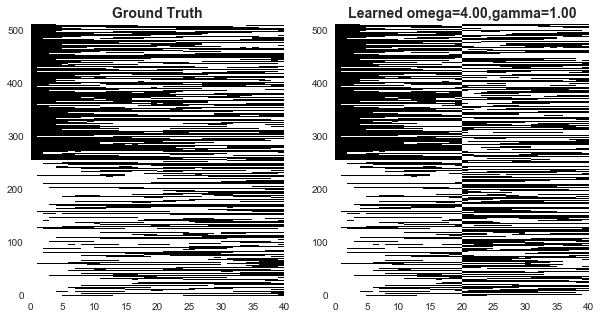

In [61]:
def get_partition_matrix(partition,layer_vec):
    #assumes partiton in same ordering for each layer
    vals=np.unique(layer_vec)
    nodeperlayer=len(layer_vec)/len(vals)
    com_matrix=np.zeros((nodeperlayer,len(vals)))
    for i,val in enumerate(vals):
        cind=np.where(layer_vec==val)[0]
        ccoms=partition[cind]
        com_matrix[:,i]=ccoms
    return com_matrix


ind=mlbp_rm['AMI'].idxmax()
ind=5
ground=get_partition_matrix(mgraph.comm_vec,mgraph.layer_vec)
learned=get_partition_matrix(mlbp.partitions[ind],mgraph.layer_vec)


plt.close()
plt.subplots(1,2,figsize=(10,5))
a=plt.subplot(1,2,1)
a.grid('off')
a.set_xlim([0,40])
a.set_title('Ground Truth',fontsize=14,fontweight='bold')
a.pcolormesh(ground)
a=plt.subplot(1,2,2)
a.pcolormesh(learned)
a.set_xlim([0,40])
a.set_title("Learned omega={:.2f},gamma={:.2f}".format(mlbp_rm.loc[ind,'omega'],
                                                      mlbp_rm.loc[ind,'resgamma']),fontsize=14,fontweight='bold')
a.grid('off')

plt.show()

In [62]:
import gzip
import pickle

with gzip.open('modularity_512')

{0: array([1, 1, 1, ..., 0, 1, 0]),
 1: array([0, 0, 0, ..., 1, 0, 1]),
 2: array([1, 1, 1, ..., 1, 0, 1]),
 3: array([0, 0, 0, ..., 1, 0, 1]),
 4: array([1, 1, 1, ..., 0, 1, 0]),
 5: array([0, 0, 0, ..., 1, 0, 1])}

# Multilayer SBM testing from cluster

In [31]:
from subprocess import Popen,PIPE
import pandas as pd
import re
import numpy as np
np.set_printoptions(precision=4,suppress=True)
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm
import pandas as pd
import os

# infile='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/test/merged_all_LFR_test_data_gamma2_beta1_k4'

infile='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/test/merged_all_SBM_test_data_n512_q2_nt100'

graphics_dir="/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/multimodbp_manuscript/graphics"
allruns=pd.read_csv(infile,index_col=0)
allruns.index=range(allruns.shape[0])
amis=allruns.groupby(['omega','resgamma','ep','eta']).mean()



In [32]:
def array2bins(arr):
    width=arr[1]-arr[0] #assume fix width
    _,edges=np.histogram(arr,bins=len(arr),range=[arr[0]-width*.5,arr[-1]+width*.5])
    return edges
print(ep)
print(array2bins(ep))

Float64Index([0.05, 0.1, 0.15, 0.2, 0.25], dtype='float64', name=u'ep')
[0.025 0.075 0.125 0.175 0.225 0.275]


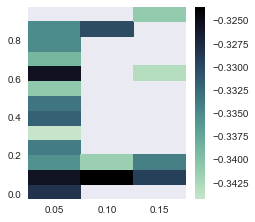

In [34]:
def array2bins(arr):
    width=arr[1]-arr[0] #assume fix width
    _,edges=np.histogram(arr,bins=len(arr),range=[arr[0]-width*.5,arr[-1]+width*.5])
    return edges

omegas=amis.index.get_level_values(0).unique()
gammas=amis.index.get_level_values(1).unique()
cmap=sbn.cubehelix_palette(rot=-.4,dark=0,as_cmap=True)
plt.close()
plt.gcf().set_size_inches((12,12))
for i,omega in enumerate(omegas):
    for j,gamma in enumerate(gammas):
        a=plt.subplot2grid((3,3),(i,j),colspan=1,rowspan=1)
        c_df=amis.loc[omega,gamma]
        ep=c_df.index.get_level_values(0).unique()
        eta=c_df.index.get_level_values(1).unique()

        X,Y=np.meshgrid(array2bins(ep),array2bins(eta),indexing='ij')
        pcm=a.pcolormesh(X,Y,amis.loc[omega,gamma]['Accuracy'].unstack().as_matrix(),cmap=cmap)
plt.colorbar(mappable=pcm)
        
plt.show()
        

In [98]:
#confirmt that it is still working on the single layer case 
import numpy as np
np.set_printoptions(precision=4,suppress=True)
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm
n = 1000
q = 2
nlayers=1
nblocks = q
c = 3
ep = .2
pin = c / (1.0 + ep * (q - 1.0)) / (n * 1.0 / q)
pout = c / (1 + (q - 1.0) / ep) / (n * 1.0 / q)


ntrials=50
gammas=[1.0]
betas=np.linspace(0,3,100)

q_tests=[2]
for i in range(ntrials):
    if i%10==0:
        print ("{:d}/{:d}".format(i,ntrials))
    prob_mat = np.identity(nblocks) * pin + (np.ones((nblocks, nblocks)) - np.identity(nblocks)) * pout
    ml_sbm = modbp.MultilayerSBM(n, comm_prob_mat=prob_mat, layers=nlayers, transition_prob=.1)
    mgraph = modbp.MultilayerGraph(ml_sbm.intraedges, ml_sbm.interedges, ml_sbm.layer_vec,
                                   comm_vec=ml_sbm.get_all_layers_block())
    mlbp = modbp.ModularityBP(mlgraph=mgraph)

    for q_test in q_tests:
#         bstar=mlbp.get_bstar(q=q)
#         betas=np.linspace(bstar,bstar+.5,5)
        for beta in betas:
            for gamma in gammas:
                    mlbp.run_modbp(q=q_test,beta=beta,resgamma=gamma,omega=0,niter=1200)
                    
    if i==0:
        allretmods=mlbp.retrieval_modularities.copy()
    else:
        allretmods=pd.concat([allretmods,mlbp.retrieval_modularities],ignore_index=True)
        



0/50
10/50
20/50
30/50
40/50


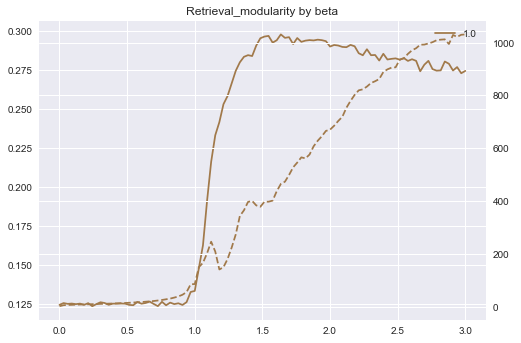

In [99]:
retmod_means=allretmods.groupby(['resgamma','beta']).mean()['retrieval_modularity'].unstack()
ami_means=allretmods.groupby(['resgamma','beta']).mean()['AMI'].unstack()
iter_means=allretmods.groupby(['resgamma','beta']).mean()['niters'].unstack()

plt.close()
f,a=plt.subplots(1,1)
a.set_title("Retrieval_modularity by beta")
cols=sbn.color_palette('cubehelix',n_colors=retmod_means.shape[0])
a2=a.twinx()
for i,gam in enumerate(retmod_means.index.values):
    a.plot(retmod_means.columns.values,retmod_means.loc[gam,:].values,color=cols[i],label=gam)
#     a.plot(ami_means.columns.values,ami_means.loc[gam,:].values,color=cols[i],label=gam,linestyle='--')
    a2.plot(iter_means.columns.values,
            iter_means.loc[gam,:].values,color=cols[i],label=gam,linestyle='--')
a.legend()
plt.show()

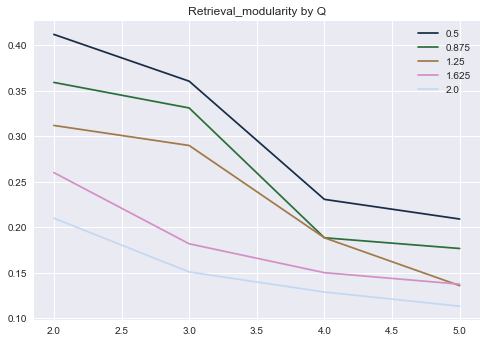

In [49]:

retmod_means=mlbp.retrieval_modularities.groupby(['resgamma','q']).max()['retrieval_modularity'].unstack()
plt.close()
f,a=plt.subplots(1,1)
a.set_title("Retrieval_modularity by Q")
cols=sbn.color_palette('cubehelix',n_colors=retmod_means.shape[0])
for i,gam in enumerate(retmod_means.index.values):
    a.plot(retmod_means.columns.values,retmod_means.loc[gam,:].values,color=cols[i],label=gam)
a.legend()
plt.show()

In [47]:
def vec_to_bins(x):
    outvec=[]
    width=x[1]-x[0] 
    outvec.append(x[0]-.5*width)
    for val in x:
        outvec.append(val+.5*width)
    return np.array(outvec)

gammabyq=mlbp.retrieval_modularities.groupby(['q','resgamma']).mean()['retrieval_modularity'].unstack()
x=vec_to_bins(gammabyq.index.values)
y=vec_to_bins(gammabyq.columns.values)
X,Y=np.meshgrid(x,y,indexing='ij')

f,a=plt.subplots(1,1,figsize=(6,6))
plt.pcolormesh(X,Y,gammabyq)
a.set_xlabel("q")
a.set_ylabel('resgamma')
plt.colorbar()
plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

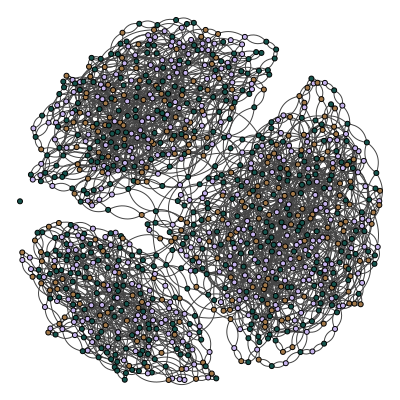

In [16]:
test=ig.Graph()
test=ig.Graph.Read_Edgelist('network.dat',directed=False)
# elist=pd.read_table('network.dat',header=None).sort_values(by=0).as_matrix()
# # elist=elist[:elist.shape[0]/2,:]
comvec=pd.read_table('community.dat',header=None).sort_values(by=0).as_matrix()[:,1]
# mgraph=modbp.MultilayerGraph(intralayer_edges=elist,layer_vec=[0 for _ in range(1000)],
#                              comm_vec=comvec)
# cgraph=mgraph.layers[0]
coms=np.unique(comvec)
colors=sbn.color_palette('cubehelix',len(coms))
cdict=dict(zip(coms,colors))                                            
test.vs['color']=map( lambda x: cdict[x], comvec)

test.vs['size']=5
adj=np.array(test.get_adjacency().data)
pos=fa2.forceatlas2(adj,scalingRatio=1000,gravity=.1,strongGravityMode=True,edgeWeightInfluence=0)
layout=ig.Layout(pos)
ig.plot(test,layout=layout,inline=True,bbox=[400,400])


In [24]:
elstdict={}
for i in range(elist.shape[0]):
    j,k=elist[i,:]
    if j>=k:
        elstdict[(j,k)]=elstdict.get((j,k),0)+1
    else:
        elstdict[(k,j)]=elstdict.get((k,j),0)+1
        
print(elstdict.items())

[((969, 218), 1), ((886, 514), 1), ((909, 584), 1), ((858, 545), 1), ((921, 159), 1), ((915, 538), 1), ((237, 38), 2), ((954, 574), 1), ((753, 668), 1), ((925, 221), 1), ((915, 362), 1), ((986, 198), 1), ((913, 686), 1), ((390, 337), 2), ((931, 579), 1), ((891, 535), 1), ((963, 501), 1), ((736, 532), 1), ((972, 174), 1), ((955, 110), 1), ((958, 380), 1), ((846, 563), 1), ((996, 594), 1), ((997, 363), 1), ((717, 677), 1), ((825, 650), 1), ((677, 19), 2), ((892, 317), 1), ((954, 293), 1), ((537, 507), 2), ((816, 623), 1), ((933, 513), 1), ((989, 675), 1), ((711, 235), 1), ((801, 120), 1), ((591, 397), 2), ((744, 557), 1), ((580, 453), 2), ((656, 189), 2), ((981, 687), 1), ((221, 191), 2), ((808, 693), 1), ((730, 156), 1), ((839, 673), 1), ((955, 455), 1), ((942, 596), 1), ((798, 115), 1), ((528, 78), 2), ((765, 559), 1), ((904, 325), 1), ((826, 524), 1), ((769, 287), 1), ((942, 107), 1), ((942, 475), 1), ((445, 178), 2), ((823, 607), 1), ((841, 655), 1), ((378, 151), 2), ((980, 127), 1),

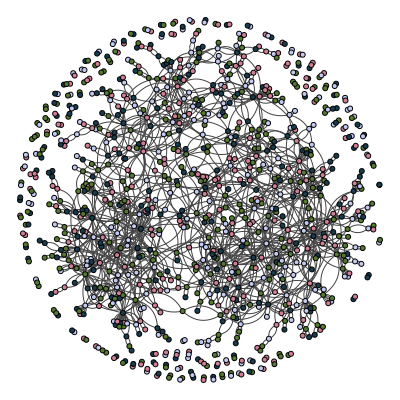

In [7]:
cgraph=mlbp_lf.layers[0]
coms=np.unique(cgraph.vs['block'])
colors=sbn.color_palette('cubehelix',len(coms))
cdict=dict(zip(coms,colors))                                            
cgraph.vs['color']=map( lambda x: cdict[x], cgraph.vs['block'])

cgraph.vs['size']=5
adj=np.array(cgraph.get_adjacency().data)
pos=fa2.forceatlas2(adj,scalingRatio=1000,gravity=.1,strongGravityMode=True,edgeWeightInfluence=0)
layout=ig.Layout(pos)
ig.plot(cgraph,layout=layout,inline=True,bbox=[400,400])
# grplt.save(os.path.join(graphics_dir,'igraph_uneven_commlayout4c.pdf'))

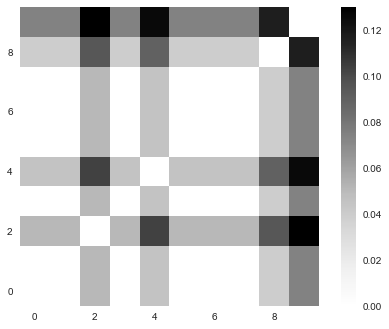

In [54]:
dmat=mlbp.group_distances[mlbp.retrieval_modularities['AMI'].idxmax()]
plt.close()
a=plt.subplot(1,1,1)
a.grid('off')
plt.imshow(dmat,origin='lower')
plt.colorbar()
plt.show()

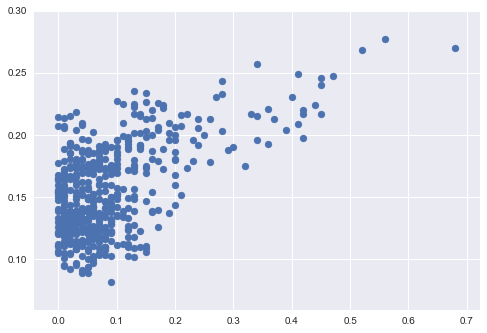

In [20]:
plt.close()
plt.scatter(mlbp.retrieval_modularities['Accuracy'],mlbp.retrieval_modularities['retrieval_modularity'])
plt.show()

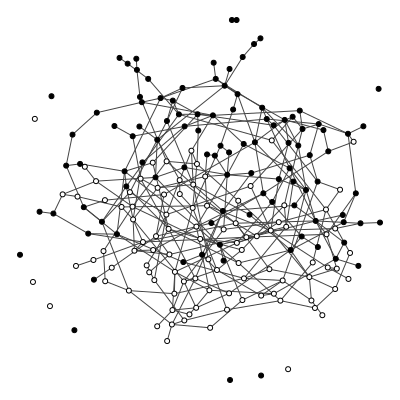

In [9]:
# Here we test on a single network for different gamma and omega values 
import numpy as np
np.set_printoptions(precision=4,suppress=True)
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm
import pandas as pd
n = 1000
q = 2
nlayers=15
nblocks = q
c = 3
ep = .15
pin = c / (1.0 + ep * (q - 1.0)) / (n * 1.0 / q)
pout = c / (1 + (q - 1.0) / ep) / (n * 1.0 / q)
prob_mat = np.identity(nblocks) * pin + (np.ones((nblocks, nblocks)) - np.identity(nblocks)) * pout
ml_sbm = modbp.MultilayerSBM(n, comm_prob_mat=prob_mat, layers=nlayers, transition_prob=.2)
mgraph = modbp.MultilayerGraph(ml_sbm.intraedges, ml_sbm.interedges, ml_sbm.layer_vec,
                               comm_vec=ml_sbm.get_all_layers_block())

mlbp = modbp.ModularityBP(mlgraph=mgraph)
bstar=mlbp.get_bstar(q=2)
# betas=np.array(map(lambda x : mlbp.get_bstar(x), range(2,5)))+.2
betas=np.linspace(bstar,bstar+.5,5)
# resgammas=np.linspace(0,10,10)
omegas=np.linspace(0,5,30)
resgammas=[1.0]
# omegas=[1.0]
ntrials=1

for gamma in resgammas:
    print(gamma)
    for omega in omegas:
        for i in range(ntrials):
            for beta in betas:
                mlbp.run_modbp(beta=beta,niter=500,
                           resgamma=gamma,q=q,
                           omega=omega,reset=True)
            
print mlbp.retrieval_modularities['AMI'].max()

1.0
0.7707792097396848


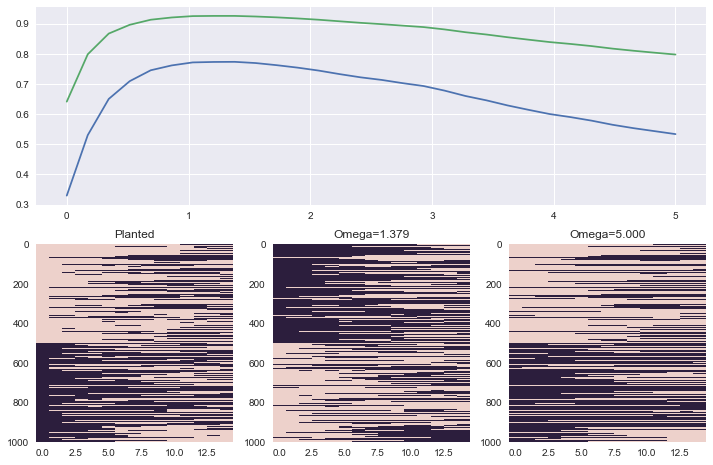

In [10]:
def get_partition_matrix(partition,layer_vec):
    #assumes partiton in same ordering for each layer
    vals=np.unique(layer_vec)
    nodeperlayer=len(layer_vec)/len(vals)
    com_matrix=np.zeros((nodeperlayer,len(vals)))
    for i,val in enumerate(vals):
        cind=np.where(layer_vec==val)[0]
        ccoms=partition[cind]
        com_matrix[:,i]=ccoms
    return com_matrix


om=mlbp.retrieval_modularities.groupby('omega').max()
om_ind=mlbp.retrieval_modularities.groupby('omega').idxmax()


plt.close()
f=plt.gcf()
f.set_size_inches(12,8)
sp_shape=(2,3)
a=plt.subplot2grid(sp_shape,(0,0),colspan=3)
a.plot(om.index,om['AMI_layer_avg'])
a.plot(om.index,om['Accuracy_layer_avg'])

# a.plot(om.index,om['retrieval_modularity'],color='green')


nodeblocks=get_partition_matrix(layer_vec=ml_sbm.layer_vec,
                                partition=ml_sbm.get_all_layers_block())

ami_idmax=mlbp.retrieval_modularities['AMI'].idxmax()
modbp_blocks=get_partition_matrix(layer_vec=ml_sbm.layer_vec,
                                 partition=mlbp.partitions[ami_idmax])

modbp_blockslast=get_partition_matrix(layer_vec=ml_sbm.layer_vec,
                                 partition=mlbp.partitions[om_ind['AMI'].iloc[-1]])

a=plt.subplot2grid(sp_shape,(1,0),colspan=1)
a.grid('off')
a.set_title('Planted')
plt.imshow(nodeblocks,aspect='auto',cmap=sbn.cubehelix_palette(as_cmap=True))

a=plt.subplot2grid(sp_shape,(1,1),colspan=1)
a.grid('off')
a.set_title('Omega={:.3f}'.format(mlbp.retrieval_modularities.loc[ami_idmax,'omega']))

plt.imshow(modbp_blocks,aspect='auto',cmap=sbn.cubehelix_palette(as_cmap=True))

a=plt.subplot2grid(sp_shape,(1,2),colspan=1)
a.grid('off')
a.set_title('Omega={:.3f}'.format(om_ind.index[-1]))

plt.imshow(modbp_blockslast,aspect='auto',cmap=sbn.cubehelix_palette(as_cmap=True))

plt.show()

In [14]:
import itertools as it
list(it.product([1,2,3,4],[1,2,3,4]))

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4)]

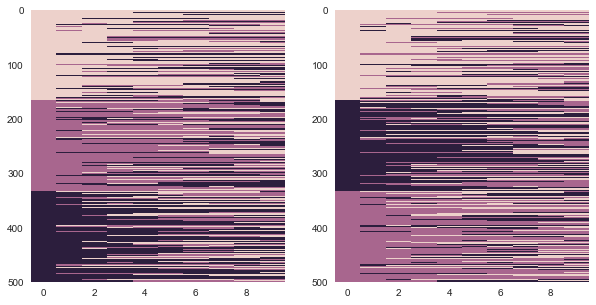

In [30]:
def get_partition_matrix(partition,layer_vec):
    #assumes partiton in same ordering for each layer
    vals=np.unique(layer_vec)
    nodeperlayer=len(layer_vec)/len(vals)
    com_matrix=np.zeros((nodeperlayer,len(vals)))
    for i,val in enumerate(vals):
        cind=np.where(layer_vec==val)[0]
        ccoms=partition[cind]
        com_matrix[:,i]=ccoms
    return com_matrix

nodeblocks=get_partition_matrix(layer_vec=ml_sbm.layer_vec,
                                partition=ml_sbm.get_all_layers_block())

modbp_blocks=get_partition_matrix(layer_vec=ml_sbm.layer_vec,
                                 partition=mlbp.partitions[mlbp.retrieval_modularities['AMI'].idxmax()])

plt.close()
f,a=plt.subplots(1,2,figsize=(10,5))
a=plt.subplot(1,2,1)
a.grid('off')
plt.imshow(nodeblocks,aspect='auto',cmap=sbn.cubehelix_palette(as_cmap=True))

a=plt.subplot(1,2,2)
a.grid('off')
plt.imshow(modbp_blocks,aspect='auto',cmap=sbn.cubehelix_palette(as_cmap=True))
plt.show()

In [32]:
import numpy as np
np.set_printoptions(precision=4,suppress=True)
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm
import pandas as pd

n = 500
q = 2
nlayers=10
nblocks = q
c = 8

eps=np.linspace(0.01,1,30)
etas=np.linspace(0,1,30)
ntrials=50
trials=range(ntrials)
allamis=pd.DataFrame(columns=['resgamma','omega','eta','ep','trial','ret_mod','ami','accuracy','t1','t2','t3','t4'],dtype=float)
ind=0
resgamma=1.0
omega=1.0
for ep in eps:
    print(ep)
    for eta in etas:
        pin = c / (1.0 + ep * (q - 1.0)) / (n * 1.0 / q)
        pout = c / (1 + (q - 1.0) / ep) / (n * 1.0 / q)
        prob_mat = np.identity(q) * pin + (np.ones((q, q)) - np.identity(q)) * pout
        for trial in trials:
            t=time()
            ml_sbm = modbp.MultilayerSBM(n, comm_prob_mat=prob_mat, layers=nlayers, transition_prob=eta)
            t1=time()
            mgraph = modbp.MultilayerGraph(ml_sbm.intraedges, ml_sbm.interedges, ml_sbm.layer_vec,
                               comm_vec=ml_sbm.get_all_layers_block())
            t2=time()
            mlbp = modbp.ModularityBP(mlgraph=mgraph)
            bstar=mlbp.get_bstar(q=q)
            t3=time()
            mlbp.run_modbp(beta=bstar,niter=500,omega=omega,q=q,resgamma=resgamma)
            t4=time()
            retmod=mlbp.retrieval_modularities.loc[0,'retrieval_modularity']
            ami=mlbp.retrieval_modularities.loc[0,'AMI']
            accuracy=mlbp.retrieval_modularities.loc[0,'Accuracy']
            allamis.loc[ind,:]=[resgamma,omega,eta,ep,trial,retmod,ami,accuracy,t1-t,t2-t1,t3-t2,t4-t3]
            ind+=1






0.01
0.04413793103448276
0.07827586206896552
0.11241379310344828
0.14655172413793105
0.1806896551724138
0.21482758620689657
0.24896551724137933
0.2831034482758621
0.31724137931034485
0.3513793103448276
0.38551724137931037
0.41965517241379313


KeyboardInterrupt: 

In [1]:
import numpy as np
np.set_printoptions(precision=4,suppress=True)
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm
from subprocess import Popen,PIPE
import pandas as pd

(18299, 12)

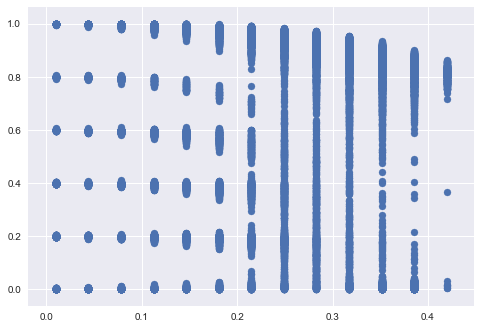

In [34]:
plt.close()
plt.scatter(allamis['ep'],allamis['accuracy'])
plt.show()

In [23]:
elist

array([[  1, 286],
       [  1, 456],
       [  2, 688],
       ...,
       [699, 952],
       [699, 836],
       [699, 660]])

In [43]:
avgus

eta       0.000000  0.034483  0.068966  0.103448  0.137931  0.172414  \
ep                                                                     
0.010000  0.527952  0.544032  0.452056  0.551928  0.548104  0.599936   
0.044138  0.644088  0.552208  0.548024  0.507824  0.571776  0.539872   
0.078276  0.607904  0.559576  0.627264  0.563232  0.635016  0.531112   
0.112414  0.591128  0.623144  0.694704  0.570344  0.574016  0.581088   
0.146552  0.713776  0.657376  0.526096  0.608152  0.654712  0.618456   
0.180690  0.628824  0.675592  0.657672  0.637448  0.686184  0.665448   
0.214828  0.695648  0.620024  0.633832  0.759968  0.681488  0.734336   
0.248966  0.790096  0.734560  0.714976  0.775456  0.775136  0.722664   
0.283103  0.802616  0.830072  0.780152  0.861744  0.845960  0.847024   
0.317241  0.803288  0.873856  0.828352  0.855632  0.865336  0.898096   
0.351379  0.848944  0.827144  0.887288  0.877056  0.856048  0.834440   
0.385517  0.880064  0.871376  0.860408  0.849640  0.840576  0.831336   
0.419655  0.838736  0.823752  0.814880  0.804752  0.738592  0.718669   

eta       0.206897  0.241379  0.275862  0.310345    ...     0.689655  \
ep                                                  ...                
0.010000  0.500096  0.571816  0.455760  0.507832    ...     0.399520   
0.044138  0.575408  0.587504  0.531296  0.487408    ...     0.417592   
0.078276  0.586304  0.566512  0.606568  0.498352    ...     0.481416   
0.112414  0.561432  0.707408  0.520888  0.575584    ...     0.532144   
0.146552  0.701192  0.542896  0.513632  0.576792    ...     0.492000   
0.180690  0.766088  0.698496  0.649408  0.675248    ...     0.494736   
0.214828  0.708848  0.726552  0.715488  0.569200    ...     0.581792   
0.248966  0.813720  0.686672  0.747704  0.636528    ...     0.540952   
0.283103  0.801936  0.830376  0.824216  0.801504    ...     0.510600   
0.317241  0.844968  0.826248  0.843288  0.809648    ...     0.700968   
0.351379  0.835816  0.830160  0.824896  0.806720    ...     0.205384   
0.385517  0.814528  0.806008  0.783800  0.764360    ...     0.008984   
0.419655       NaN       NaN       NaN       NaN    ...          NaN   

eta       0.724138  0.758621  0.793103  0.827586  0.862069  0.896552  \
ep                                                                     
0.010000  0.467216  0.390632  0.379008  0.371320  0.330920  0.318832   
0.044138  0.409088  0.381456  0.381328  0.397328  0.369056  0.301064   
0.078276  0.442048  0.453896  0.362600  0.389264  0.369256  0.274976   
0.112414  0.507824  0.378704  0.367288  0.333968  0.360160  0.359152   
0.146552  0.473728  0.422760  0.427864  0.415144  0.302856  0.330352   
0.180690  0.465200  0.400752  0.515152  0.431248  0.428112  0.322808   
0.214828  0.603864  0.482424  0.478512  0.497008  0.497864  0.388040   
0.248966  0.510536  0.485832  0.524984  0.425360  0.401400  0.341328   
0.283103  0.596992  0.555968  0.544760  0.482840  0.457960  0.403480   
0.317241  0.649824  0.629088  0.475072  0.384792  0.226760  0.144784   
0.351379  0.148152  0.076984  0.060016  0.029344  0.026464  0.009096   
0.385517  0.012672  0.010264  0.010864  0.011640  0.009176  0.011936   
0.419655       NaN       NaN       NaN       NaN       NaN       NaN   

eta       0.931034  0.965517  1.000000  
ep                                      
0.010000  0.287320  0.274616  0.275080  
0.044138  0.304720  0.229640  0.291760  
0.078276  0.216648  0.278336  0.223008  
0.112414  0.296888  0.272632  0.254696  
0.146552  0.289424  0.288152  0.232104  
0.180690  0.345616  0.224624  0.218384  
0.214828  0.287016  0.292008  0.172568  
0.248966  0.346256  0.233744  0.244120  
0.283103  0.275160  0.223344  0.162408  
0.317241  0.058864  0.081432  0.029104  
0.351379  0.014696  0.011264  0.011432  
0.385517  0.011120  0.012568  0.011104  
0.419655       NaN       NaN       NaN  

[13 rows x 30 columns]

(13, 30)
(13, 30)
(13, 30)


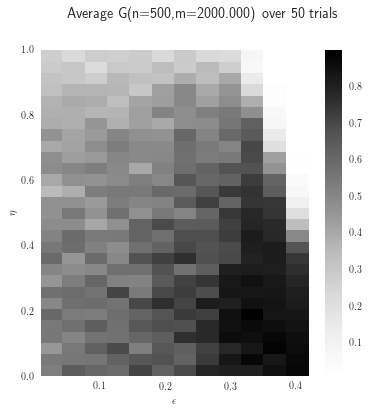

In [49]:
avgamis=allamis.groupby(['eta','ep']).mean()['accuracy']
avgus=avgamis.unstack().T
y=avgus.columns.values
x=avgus.index.values
X,Y=np.meshgrid(x,y,indexing='ij')
print(avgus.shape)
print(X.shape)
print(Y.shape)
plt.rc('text',usetex=True)
plt.close()
f,a=plt.subplots(1,1,figsize=(6,6))
a=plt.subplot(1,1,1)
plt.pcolormesh(X,Y,avgus)
plt.colorbar()
a.set_ylabel(r'$\eta$')
a.set_xlabel(r'$\epsilon$')
plt.suptitle("Average  G(n={:d},m={:.3f}) over {:d} trials".format(n,c*n/2.0,ntrials))
plt.show()

plt.rc('text',usetex=False)

In [15]:
allamis.columns

Index([u'ep', u'eta', u'resgamma', u'omega', u'retrieval_modularity', u'AMI',
       u'Accuracy'],
      dtype='object')

(50, 50)
(50, 50)
(50, 50)


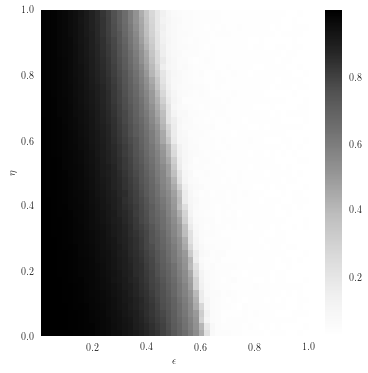

In [19]:
import gzip
import cPickle as pickle
amifile='/Users/whweir/Documents/UNC_SOM_docs/Mucha_Lab/Mucha_Python/ModBP_gh/ModularityBP_Cpp/modbp/eta_eps_scan_50trials'
with gzip.open(amifile,'r') as fh:
    allamis=pickle.load(fh)
allamis=allamis.astype(float)
avgamis=allamis.groupby(['eta','ep']).mean()['Accuracy']
avgus=avgamis.unstack().T
y=avgus.columns.values
x=avgus.index.values
X,Y=np.meshgrid(x,y,indexing='ij')
print(avgus.shape)
print(X.shape)
print(Y.shape)
plt.rc('text',usetex=True)
plt.close()
f,a=plt.subplots(1,1,figsize=(6,6))
a=plt.subplot(1,1,1)
plt.pcolormesh(X,Y,avgus)
plt.colorbar()
a.set_ylabel(r'$\eta$')
a.set_xlabel(r'$\epsilon$')
# plt.suptitle("Average  G(n={:d},m={:.3f}) over {:d} trials".format(n,c*n/2.0,ntrials))
plt.show()

plt.rc('text',usetex=False)

In [8]:
allamis.groupby(['ep','eta'])

ep eta resgamma omega retrieval_modularity          AMI  \
0          0.01   0        1     1             0.382533     0.999034   
1     0.0391176   0        1     1             0.371371      0.99764   
2     0.0682353   0        1     1             0.362093     0.993869   
3     0.0973529   0        1     1             0.354523     0.990041   
4      0.126471   0        1     1             0.345227      0.98238   
5      0.155588   0        1     1             0.334524     0.969022   
6      0.184706   0        1     1             0.331987     0.964904   
7      0.213824   0        1     1             0.320361     0.934785   
8      0.242941   0        1     1             0.311235     0.891187   
9      0.272059   0        1     1             0.304907      0.86232   
10     0.301176   0        1     1             0.302215     0.849517   
11     0.330294   0        1     1             0.294347     0.793618   
12     0.359412   0        1     1             0.287777     0.734636   
13     0.388529   0        1     1             0.283608     0.701121   
14     0.417647   0        1     1             0.277201      0.62564   
15     0.446765   0        1     1               0.2731     0.571008   
16     0.475882   0        1     1             0.268318      0.49874   
17        0.505   0        1     1             0.263862     0.427616   
18     0.534118   0        1     1             0.259192     0.361083   
19     0.563235   0        1     1             0.205048     0.156909   
20     0.592353   0        1     1             0.148746 -0.000113344   
21     0.621471   0        1     1               0.1491 -0.000114053   
22     0.650588   0        1     1              0.14899  0.000120589   
23     0.679706   0        1     1             0.148691  3.44808e-05   
24     0.708824   0        1     1              0.14945 -9.21094e-05   
25     0.737941   0        1     1             0.149038 -1.27191e-05   
26     0.767059   0        1     1             0.149282 -0.000203999   
27     0.796176   0        1     1             0.148698  0.000373338   
28     0.825294   0        1     1             0.149037 -2.32568e-06   
29     0.854412   0        1     1             0.149177 -7.79528e-05   
...         ...  ..      ...   ...                  ...          ...   
1195   0.155588   1        1     1             0.297229     0.771878   
1196   0.184706   1        1     1             0.289452     0.702152   
1197   0.213824   1        1     1              0.28236     0.628945   
1198   0.242941   1        1     1             0.275642     0.548763   
1199   0.272059   1        1     1             0.268749     0.451318   
1200   0.301176   1        1     1             0.262572     0.359524   
1201   0.330294   1        1     1             0.256138     0.253187   
1202   0.359412   1        1     1             0.250305     0.167638   
1203   0.388529   1        1     1             0.234443    0.0804057   
1204   0.417647   1        1     1             0.172963    0.0158958   
1205   0.446765   1        1     1             0.156332   0.00146296   
1206   0.475882   1        1     1             0.148835 -0.000169891   
1207      0.505   1        1     1             0.148583 -0.000149367   
1208   0.534118   1        1     1             0.148922 -8.18684e-05   
1209   0.563235   1        1     1             0.148312 -0.000209514   
1210   0.592353   1        1     1             0.148588 -0.000252905   
1211   0.621471   1        1     1             0.148535  -7.3764e-05   
1212   0.650588   1        1     1             0.148894  3.35297e-05   
1213   0.679706   1        1     1             0.148612 -9.59754e-05   
1214   0.708824   1        1     1             0.148915 -0.000107025   
1215   0.737941   1        1     1              0.14923 -0.000123725   
1216   0.767059   1        1     1              0.14932  0.000473344   
1217   0.796176   1        1     1              0.14891  0.000121194   
1218   0.825294   1        1     1             0.1493

In [94]:
import itertools as it
list(it.permutations([1,0,0,1,0,1]))

{(0, 0, 0, 1, 1, 1),
 (0, 0, 1, 0, 1, 1),
 (0, 0, 1, 1, 0, 1),
 (0, 0, 1, 1, 1, 0),
 (0, 1, 0, 0, 1, 1),
 (0, 1, 0, 1, 0, 1),
 (0, 1, 0, 1, 1, 0),
 (0, 1, 1, 0, 0, 1),
 (0, 1, 1, 0, 1, 0),
 (0, 1, 1, 1, 0, 0),
 (1, 0, 0, 0, 1, 1),
 (1, 0, 0, 1, 0, 1),
 (1, 0, 0, 1, 1, 0),
 (1, 0, 1, 0, 0, 1),
 (1, 0, 1, 0, 1, 0),
 (1, 0, 1, 1, 0, 0),
 (1, 1, 0, 0, 0, 1),
 (1, 1, 0, 0, 1, 0),
 (1, 1, 0, 1, 0, 0),
 (1, 1, 1, 0, 0, 0)}